In [ ]:
# Started on 6th Aug 2023 5:00 am

# Capstone Project - Twitter Bot Detection
# By Parthasarathi S (21pd24) and Sanjay Ram RR (21pd32)

In [ ]:
! pip install datasketch
! pip install wordnet
! pip install joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordnet: filename=wordnet-0.0.1b2-py3-none-any.whl size=10502 sha256=944a7d3a9b228333f706cef564addd9c04afb01f687a37aeeacf46381956d923
  Stored in directory: /root/.cache/pip/wheels/c0/a1/e8/4649c8712033dcdbd1e64a0fc75216a5d1769665852c36b4f9
Successfully built wordnet


# **Importing Libraries**

In [ ]:
# ------------------------------
# Importing neccessary libraries
# ------------------------------

import re
import ast
import time
import nltk
import joblib
import random
import codecs
import wordnet
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from scipy import stats
from nltk import pos_tag
from random import shuffle
import plotly.express as px
import plotly.subplots as sp
from textblob import TextBlob
from nltk import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from wordcloud import STOPWORDS
from scipy.sparse import hstack
import plotly.graph_objects as go
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from geopy.geocoders import Nominatim
from nltk.stem import WordNetLemmatizer
from plotly.subplots import make_subplots
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from datasketch import MinHash, MinHashLSHForest
from concurrent.futures import ThreadPoolExecutor
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# --------------------------------

In [ ]:
# ------------------------------------
# Download the required NLTK resources
# ------------------------------------

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

# -------------------------------------------

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# **Mounting drive**

In [ ]:
# ------------------------------
# Mounting Google drive
# ------------------------------

from google.colab import drive
drive.mount('/content/drive')

# ------------------------------

Mounted at /content/drive


# **Reading the Models**

In [ ]:
forestTweets = joblib.load('/content/drive/MyDrive/Models/LSHForest_Tweets.joblib')
forestFFVL = joblib.load('/content/drive/MyDrive/Models/LSHForest_FFVL.joblib')

# **Reading the 2 Datasets**

In [ ]:
# -------------------
# Reading the Dataset
# -------------------

botData = pd.read_csv("/content/drive/MyDrive/Datasets/all_50_bot_tweets.csv")
humanData = pd.read_csv("/content/drive/MyDrive/Datasets/all_50_human_tweets.csv")

# **Joining the 2 datasets**

In [ ]:
# --------------------------------------------------
# Joining the datasets with label and saving the csv
# --------------------------------------------------

"""

botData["Label"] = 0
humanData["Label"] = 1

# Combine the two datasets
combinedData = pd.concat([botData, humanData])

# Shuffle the rows in the combined DataFrame to mix the data
combinedData = combinedData.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the first few rows of the combined and mixed DataFrame
print(combinedData.head())

# Saving as CSV
combinedData.to_csv("/content/drive/MyDrive/Datasets/Twitter_Data.csv", index=False)

"""

'\n\nbotData["Label"] = 0\nhumanData["Label"] = 1\n\n# Combine the two datasets\ncombinedData = pd.concat([botData, humanData])\n\n# Shuffle the rows in the combined DataFrame to mix the data\ncombinedData = combinedData.sample(frac=1, random_state=42).reset_index(drop=True)\n\n# Print the first few rows of the combined and mixed DataFrame\nprint(combinedData.head())\n\n# Saving as CSV\ncombinedData.to_csv("/content/drive/MyDrive/Datasets/Twitter_Data.csv", index=False)\n\n'

# **Reading the main Data**

In [ ]:
TwitterData = pd.read_csv("/content/drive/MyDrive/Datasets/Twitter_Data.csv")

# **Data Description**

In [ ]:
TwitterData.shape

(292626, 7)

In [ ]:
TwitterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292626 entries, 0 to 292625
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Twitter_User_Name         292626 non-null  object
 1   Twitter_Account           292626 non-null  object
 2   Twitter_User_Description  288962 non-null  object
 3   Tweet_id                  292626 non-null  int64 
 4   Tweet_created_at          292626 non-null  object
 5   Tweet_text                292626 non-null  object
 6   Label                     292626 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 15.6+ MB


In [ ]:
TwitterData.isnull().sum()

Twitter_User_Name              0
Twitter_Account                0
Twitter_User_Description    3664
Tweet_id                       0
Tweet_created_at               0
Tweet_text                     0
Label                          0
dtype: int64

In [ ]:
TwitterData.duplicated().sum()

12278

# **Feature Engineering**

In [ ]:
TwitterData["Tweet_text"] = TwitterData["Tweet_text"].apply(lambda x : x[2:-1])

In [ ]:
# ----------------------------
# Number of words in the Tweet
# ----------------------------

TwitterData['Word_Count'] = TwitterData["Tweet_text"]
TwitterData['Word_Count'] = TwitterData['Word_Count'].apply(lambda x : len(x.split()))

In [ ]:
# ---------------------------
# Number of urls in the Tweet
# ---------------------------

TwitterData['Url_Count'] = TwitterData['Tweet_text']
TwitterData['Url_Count'] = TwitterData['Url_Count'].apply(lambda x: len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x)))

In [ ]:
# -------------------------------
# Number of Retweets in the Tweet
# -------------------------------

def countRetweet(tweet):
  if tweet.startswith('RT @'):
    return 1
  return 0

TwitterData['Retweet'] = TwitterData['Tweet_text']
TwitterData['Retweet'] = TwitterData['Retweet'].apply(countRetweet)

In [ ]:
# ----------------------------
# Original User in the Retweet
# ----------------------------

# Filter tweets with retweet count greater than 1
retweeted_tweets = TwitterData[TwitterData['Retweet'] >= 1].copy()

# Function to extract original user from tweet text
def extract_original_user(tweet_text):
    match = re.search(r'RT @(\w+)', tweet_text)
    if match:
        return match.group(1)
    return None

# Apply the function to extract original users
retweeted_tweets['Original_User'] = retweeted_tweets['Tweet_text'].apply(extract_original_user)
TwitterData['Original_User'] = retweeted_tweets['Original_User']

In [ ]:
# -------------------------------
# Number of Mentions in the Tweet
# -------------------------------

TwitterData['Mentions_Count'] = TwitterData['Tweet_text']
TwitterData['Mentions_Count'] = TwitterData['Mentions_Count'].apply(lambda x: len(re.findall(r'(?<!RT\s)@\w+', x)))

In [ ]:
# -------------------------------
# Number of Hashtags in the Tweet
# -------------------------------

def count_hashtags(tweet):
  tweet_without_urls = re.sub(r'http\S+|www\S+', '', tweet)
  return len(re.findall(r'#\w+', tweet))

TwitterData['Hashtags_Count'] = TwitterData['Tweet_text']
TwitterData['Hashtags_Count'] = TwitterData['Hashtags_Count'].apply(count_hashtags)

In [ ]:
# ------------------------------------
# Number of QuestionMarks in the Tweet
# ------------------------------------

def count_questions(tweet):
  tweet_without_urls = re.sub(r'http\S+|www\S+', '', tweet)
  return tweet_without_urls.count('?')

TwitterData['QuesMark_Count'] = TwitterData['Tweet_text']
TwitterData['QuesMark_Count'] = TwitterData['QuesMark_Count'].apply(count_questions)

In [ ]:
# -----------------------------------
# Number of Exclamations in the Tweet
# -----------------------------------

def count_exclamations(tweet):
  tweet_without_urls = re.sub(r'http\S+|www\S+', '', tweet)
  return tweet_without_urls.count('!')

TwitterData['Exclamations_Count'] = TwitterData['Tweet_text']
TwitterData['Exclamations_Count'] = TwitterData['Exclamations_Count'].apply(count_exclamations)

In [ ]:
# -----------------------------------------
# Number of Special Characters in the Tweet
# -----------------------------------------

def count_special_characters(tweet):
  tweet_without_urls = re.sub(r'http\S+|www\S+', '', tweet)
  special_characters = re.findall(r'[^\w\s]', tweet_without_urls)
  return len(special_characters)

TwitterData['SpecialCharacters_Count'] = TwitterData['Tweet_text']
TwitterData['SpecialCharacters_Count'] = TwitterData['SpecialCharacters_Count'].apply(count_special_characters)

In [ ]:
# ---------------------------------------
# Number of Nouns in the Tweet - (10mins)
# ---------------------------------------

def count_nouns(tweet):
  words = word_tokenize(tweet)
  # Get the part-of-speech (POS) tags for each word
  pos_tags = pos_tag(words)
  # Filter out stopwords and retain nouns (NN, NNS, NNP, NNPS)
  stop_words = set(stopwords.words('english'))
  nouns = [word for word, pos in pos_tags if pos.startswith('NN') and word.lower() not in stop_words]
  return len(nouns)

TwitterData['Nouns_Count'] = TwitterData['Tweet_text']
TwitterData['Nouns_Count'] = TwitterData['Nouns_Count'].apply(count_nouns)

In [ ]:
# ------------------------------------------
# Number of Pronouns in the Tweet - (15mins)
# ------------------------------------------

def count_pronouns(tweet):
  words = word_tokenize(tweet)
  # Get the part-of-speech (POS) tags for each word
  pos_tags = pos_tag(words)
  # Filter out stopwords and retain pronouns (PRP, PRP$, WP, WP$)
  stop_words = set(stopwords.words('english'))
  pronouns = [word for word, pos in pos_tags if pos.startswith('PRP') and word.lower() not in stop_words]
  return len(pronouns)

TwitterData['Pronouns_Count'] = TwitterData['Tweet_text']
TwitterData['Pronouns_Count'] = TwitterData['Pronouns_Count'].apply(count_pronouns)

In [ ]:
# --------------------------------------
# Number of Verbs in the Tweet - (8mins)
# --------------------------------------

def count_verbs(tweet):
  words = word_tokenize(tweet)
  # Get the part-of-speech (POS) tags for each word
  pos_tags = pos_tag(words)
  # Filter out stopwords and retain verbs (VB, VBD, VBG, VBN, VBP, VBZ)
  stop_words = set(stopwords.words('english'))
  verbs = [word for word, pos in pos_tags if pos.startswith('VB') and word.lower() not in stop_words]
  return len(verbs)

TwitterData['Verb_Count'] = TwitterData['Tweet_text']
TwitterData['Verb_Count'] = TwitterData['Verb_Count'].apply(count_verbs)

In [ ]:
# ------------------------------
# Number of Adverbs in the Tweet
# ------------------------------

def count_adverbs(tweet):
  words = word_tokenize(tweet)
  # Get the part-of-speech (POS) tags for each word
  pos_tags = pos_tag(words)
  # Filter out stopwords and retain adverbs (RB, RBR, RBS)
  stop_words = set(stopwords.words('english'))
  adverbs = [word for word, pos in pos_tags if pos.startswith('RB') and word.lower() not in stop_words]
  return len(adverbs)

TwitterData['Adverb_Count'] = TwitterData['Tweet_text']
TwitterData['Adverb_Count'] = TwitterData['Adverb_Count'].apply(count_adverbs)

In [ ]:
# ------------------------
# Number of Positive Words
# ------------------------

# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate the ratio of positive words to total words in a tweet
def calculate_positive_word_ratio(tweet_text):
    tokens = word_tokenize(tweet_text)
    num_words = len(tokens)
    positive_words = [token for token in tokens if sia.polarity_scores(token)['compound'] > 0]
    num_positive_words = len(positive_words)
    if num_words == 0:
        return 0
    return num_positive_words / num_words

# Apply the function to calculate positive word ratio for each tweet
TwitterData['Positive_Word_Ratio'] = TwitterData['Tweet_text'].apply(calculate_positive_word_ratio)
TwitterData['Positive_Word_Ratio']

In [ ]:
# ------------------------
# Number of Negative Words
# ------------------------

# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate the ratio of positive words to total words in a tweet
def calculate_negative_word_ratio(tweet_text):
    tokens = word_tokenize(tweet_text)
    num_words = len(tokens)
    negative_words = [token for token in tokens if sia.polarity_scores(token)['compound'] < 0]
    num_negative_words = len(negative_words)
    if num_words == 0:
        return 0
    return num_negative_words / num_words

# Apply the function to calculate positive word ratio for each tweet
TwitterData['Negative_Word_Ratio'] = TwitterData['Tweet_text'].apply(calculate_negative_word_ratio)
TwitterData['Negative_Word_Ratio']

In [ ]:
# -----------------------
# Number of Neutral Words
# -----------------------

# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate the ratio of neutral words to total words in a tweet
def calculate_neutral_word_ratio(tweet_text):
    tokens = word_tokenize(tweet_text)
    num_words = len(tokens)
    neutral_words = [token for token in tokens if sia.polarity_scores(token)['compound'] == 0]
    num_neutral_words = len(neutral_words)
    if num_words == 0:
        return 0
    return num_neutral_words / num_words

# Apply the function to calculate neutral word ratio for each tweet
TwitterData['Neutral_Word_Ratio'] = TwitterData['Tweet_text'].apply(calculate_neutral_word_ratio)
TwitterData['Neutral_Word_Ratio']

In [ ]:
TwitterData.to_csv('/content/drive/MyDrive/Datasets/TwitterData_FE.csv', index=False)

# **Reading the FE_Data**

In [ ]:
TwitterData = pd.read_csv("/content/drive/MyDrive/Datasets/TwitterData_FE.csv")

# **Reading the Users Data**

In [ ]:
TwitterUsers = pd.read_csv("/content/drive/MyDrive/Datasets/Twitter_Users.csv", encoding='latin1')

# **Joining Datasets**

In [ ]:
TwitterData_Joined = TwitterData.merge(TwitterUsers, on='Twitter_User_Name', how='inner')
TwitterData_Joined

In [ ]:
#TwitterData_Joined.to_csv('/content/drive/MyDrive/Datasets/TwitterData_Joined.csv', index=False)

# **Data Visualisations**

In [ ]:
# --------------------------
# Number of tweets over time
# --------------------------

# Convert "Tweet_created_at" to datetime format
TwitterData['Tweet_created_at'] = pd.to_datetime(TwitterData['Tweet_created_at'])

bot_tweets = TwitterData[TwitterData['Label'] == 0]
human_tweets = TwitterData[TwitterData['Label'] == 1]

daily_bot_tweet_count = bot_tweets.groupby(bot_tweets['Tweet_created_at'].dt.date).size().reset_index(name='Bot Count')
daily_human_tweet_count = human_tweets.groupby(human_tweets['Tweet_created_at'].dt.date).size().reset_index(name='Human Count')

# Create subplot with two y-axes
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add bot tweet line chart to the upper subplot
fig.add_trace(
    go.Scatter(x = daily_bot_tweet_count['Tweet_created_at'], y = daily_bot_tweet_count['Bot Count'], mode ='lines', name ='Bot Tweets'),
    row = 1, col = 1
)

# Add human tweet line chart to the lower subplot
fig.add_trace(
    go.Scatter(x = daily_human_tweet_count['Tweet_created_at'], y = daily_human_tweet_count['Human Count'], mode = 'lines', name = 'Human Tweets'),
    row = 2, col = 1
)

# Update layout for upper subplot (bot tweets)
fig.update_yaxes(title_text = 'Bot Tweets', row = 1, col = 1)
fig.update_xaxes(title_text = 'Tweet Creation Date', row = 1, col = 1)

# Update layout for lower subplot (human tweets)
fig.update_yaxes(title_text = 'Human Tweets', row = 2, col = 1)
fig.update_xaxes(title_text = 'Tweet Creation Date', row = 2, col =1 )

# Update main layout
fig.update_layout(title = 'Number of Tweets Over Time', showlegend = True)

# Show the plot
fig.show()

In [ ]:
# ------------------
# Sentiment Analysis
# ------------------

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis and create a new 'Sentiment' column
TwitterData['Sentiment'] = TwitterData['Tweet_text'].apply(get_sentiment)

# Separate bot and human tweets
bot_tweets = TwitterData[TwitterData['Label'] == 0]
human_tweets = TwitterData[TwitterData['Label'] == 1]

# Calculate sentiment distribution for bot and human tweets
bot_sentiment_distribution = bot_tweets.groupby(['Twitter_User_Name', 'Sentiment']).size().unstack().fillna(0)
human_sentiment_distribution = human_tweets.groupby(['Twitter_User_Name', 'Sentiment']).size().unstack().fillna(0)

# Combine bot and human sentiment distributions
combined_sentiment_distribution = pd.concat([bot_sentiment_distribution, human_sentiment_distribution], keys=['Bot', 'Human'])

# Reset index for plotting
bot_sentiment_distribution.reset_index(inplace=True)
human_sentiment_distribution.reset_index(inplace=True)

# Create subplots for bot and human sentiment distribution
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=False, vertical_spacing = 0.2, subplot_titles=('Bot Tweets', 'Human Tweets'))

# Add grouped bar chart for bot tweets
bot_fig = px.bar(
    bot_sentiment_distribution,
    x='Twitter_User_Name',
    y=['positive', 'neutral', 'negative'],
    color_discrete_map={'positive': '#00ff00', 'neutral': '#888888', 'negative': '#ff0000'},
    barmode='group',
    title='Sentiment Distribution for Bot Tweets',
    labels={'Twitter_User_Name': 'Twitter User', 'value': 'Tweet Count'},
    height=400
)
for data in bot_fig.data:
    fig.add_trace(data, row=1, col=1)

# Add grouped bar chart for human tweets
human_fig = px.bar(
    human_sentiment_distribution,
    x='Twitter_User_Name',
    y=['positive', 'neutral', 'negative'],
    color_discrete_map={'positive': '#00ff00', 'neutral': '#888888', 'negative': '#ff0000'},
    barmode='group',
    title='Sentiment Distribution for Human Tweets',
    labels={'Twitter_User_Name': 'Twitter User', 'value': 'Tweet Count'},
    height=400
)
for data in human_fig.data:
    fig.add_trace(data, row=2, col=1)

# Update layout for subplots
fig.update_layout(
    title='Sentiment Distribution for Bot and Human Tweets',
    height=1500,
    showlegend=True
)

# Show the plot
fig.show()

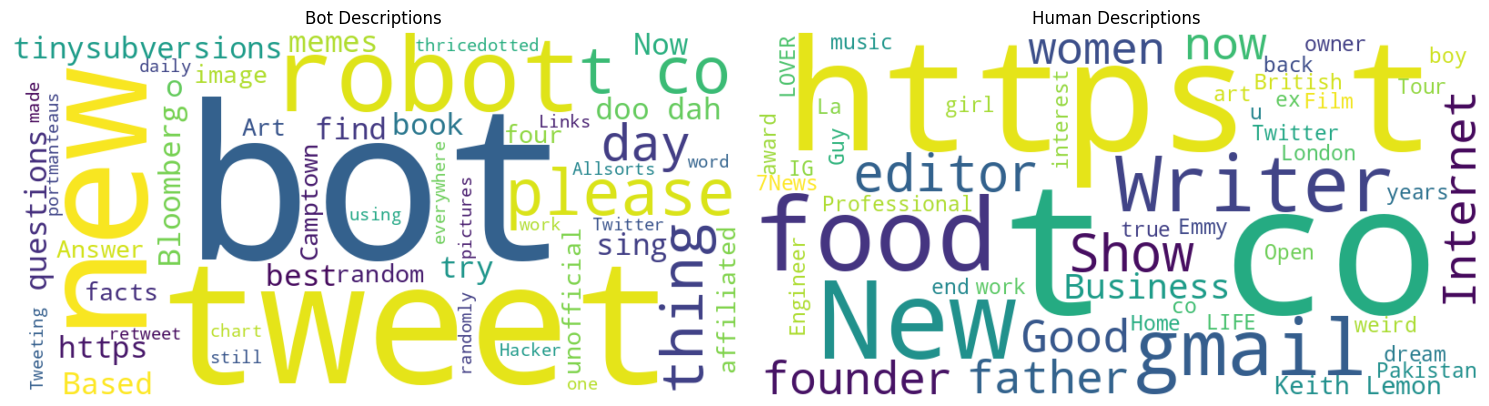

In [ ]:
# -------------------------------
# Word Cloud for User Description
# -------------------------------

df = pd.DataFrame(TwitterData)
df['Twitter_User_Description'] = df['Twitter_User_Description'].astype(str)

# Group descriptions by account and keep only unique ones
unique_descriptions = df.groupby('Twitter_User_Name')['Twitter_User_Description'].unique().apply(lambda x: ' '.join(x))

# Preprocessing and generating word clouds for bot and human descriptions
bot_accounts = df[df['Label'] == 0]['Twitter_User_Name']
human_accounts = df[df['Label'] == 1]['Twitter_User_Name']

bot_descriptions = unique_descriptions[bot_accounts]
bot_descriptions = bot_descriptions.drop_duplicates()
human_descriptions = unique_descriptions[human_accounts]
human_descriptions = human_descriptions.drop_duplicates()

# Convert descriptions to text for word cloud generation
bot_text = " ".join(bot_descriptions)
human_text = " ".join(human_descriptions)

# Generate word clouds
bot_stopwords = set(STOPWORDS)
bot_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=bot_stopwords, max_words=50).generate(bot_text)

human_stopwords = set(STOPWORDS)
human_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=human_stopwords, max_words=50).generate(human_text)

# Display the word clouds using matplotlib
plt.figure(figsize=(15, 8))

# Plot for bot descriptions
plt.subplot(1, 2, 1)
plt.imshow(bot_wordcloud, interpolation='bilinear')
plt.title('Bot Descriptions')
plt.axis('off')

# Plot for human descriptions
plt.subplot(1, 2, 2)
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Human Descriptions')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# -------------------------------
# Common words in the description
# -------------------------------

# Get the most common words from bot and human descriptions
bot_common_words = list(bot_wordcloud.words_.keys())
human_common_words = list(human_wordcloud.words_.keys())

# Find unique words for bot and human descriptions
unique_bot_words = [word for word in bot_common_words if word not in human_common_words]
unique_human_words = [word for word in human_common_words if word not in bot_common_words]

# Display the unique words
print("Unique words in bot descriptions:", unique_bot_words)
print("Unique words in human descriptions:", unique_human_words)

Unique words in bot descriptions: ['bot', 'tweet', 'new', 'robot', 'please', 'thing', 'day', 'tinysubversions', 'questions', 'Based', 'sing', 'Now', 'find', 'try', 'best', 'o', 'memes', 'https', 'Bloomberg', 'book', 'doo dah', 'random', 'image', 'Art', 'four', 'unofficial', 'affiliated', 'facts', 'Camptown', 'Answer', 'thricedotted', 'word', 'randomly', 'daily', 'portmanteaus', 'everywhere', 'Allsorts', 'Tweeting', 'Hacker', 'one', 'chart', 'retweet', 'still', 'using', 'made', 'Links', 'pictures']
Unique words in human descriptions: ['https t', 'New', 'food', 'gmail', 'Writer', 'editor', 'Show', 'father', 'Good', 'women', 'founder', 'now', 'Internet', 'Business', 'Keith Lemon', 'London', 'Emmy', 'award', '7News', 'co', 'years', 'weird', 'ex', 'Professional', 'LOVER', 'LIFE', 'girl', 'boy', 'back', 'dream', 'true', 'IG', 'u', 'end', 'Guy', 'art', 'owner', 'Open', 'Home', 'Tour', 'Film', 'La', 'Pakistan', 'Engineer', 'interest', 'music', 'British']


In [ ]:
# --------------------------
# User Engagement Comparison
# --------------------------

# Calculate average engagement metrics for bot tweets
bot_tweets = TwitterData[TwitterData['Label'] == 0]
average_engagement_bot = bot_tweets.groupby('Twitter_User_Name')[['Retweet', 'Mentions_Count', 'Hashtags_Count']].mean().reset_index()

# Create a bar chart for average engagement metrics of bot tweets
fig_bot = px.bar(
    average_engagement_bot,
    x='Twitter_User_Name',
    y=['Retweet', 'Mentions_Count', 'Hashtags_Count'],
    title='Average Engagement Metrics for Bot Tweets',
    labels={'Twitter_User_Name': 'Twitter User', 'value': 'Average Count'},
    color_discrete_map={'Likes': 'blue', 'Retweets': 'green'},
    height=600
)

# Show the bot tweets plot
fig_bot.show()

# Calculate average engagement metrics for human tweets
human_tweets = TwitterData[TwitterData['Label'] == 1]
average_engagement_human = human_tweets.groupby('Twitter_User_Name')[['Retweet', 'Mentions_Count', 'Hashtags_Count']].mean().reset_index()

# Create a bar chart for average engagement metrics of human tweets
fig_human = px.bar(
    average_engagement_human,
    x='Twitter_User_Name',
    y=['Retweet', 'Mentions_Count', 'Hashtags_Count'],
    title='Average Engagement Metrics for Human Tweets',
    labels={'Twitter_User_Name': 'Twitter User', 'value': 'Average Count'},
    color_discrete_map={'Likes': 'blue', 'Retweets': 'green'},
    height=600
)

# Show the human tweets plot
fig_human.show()

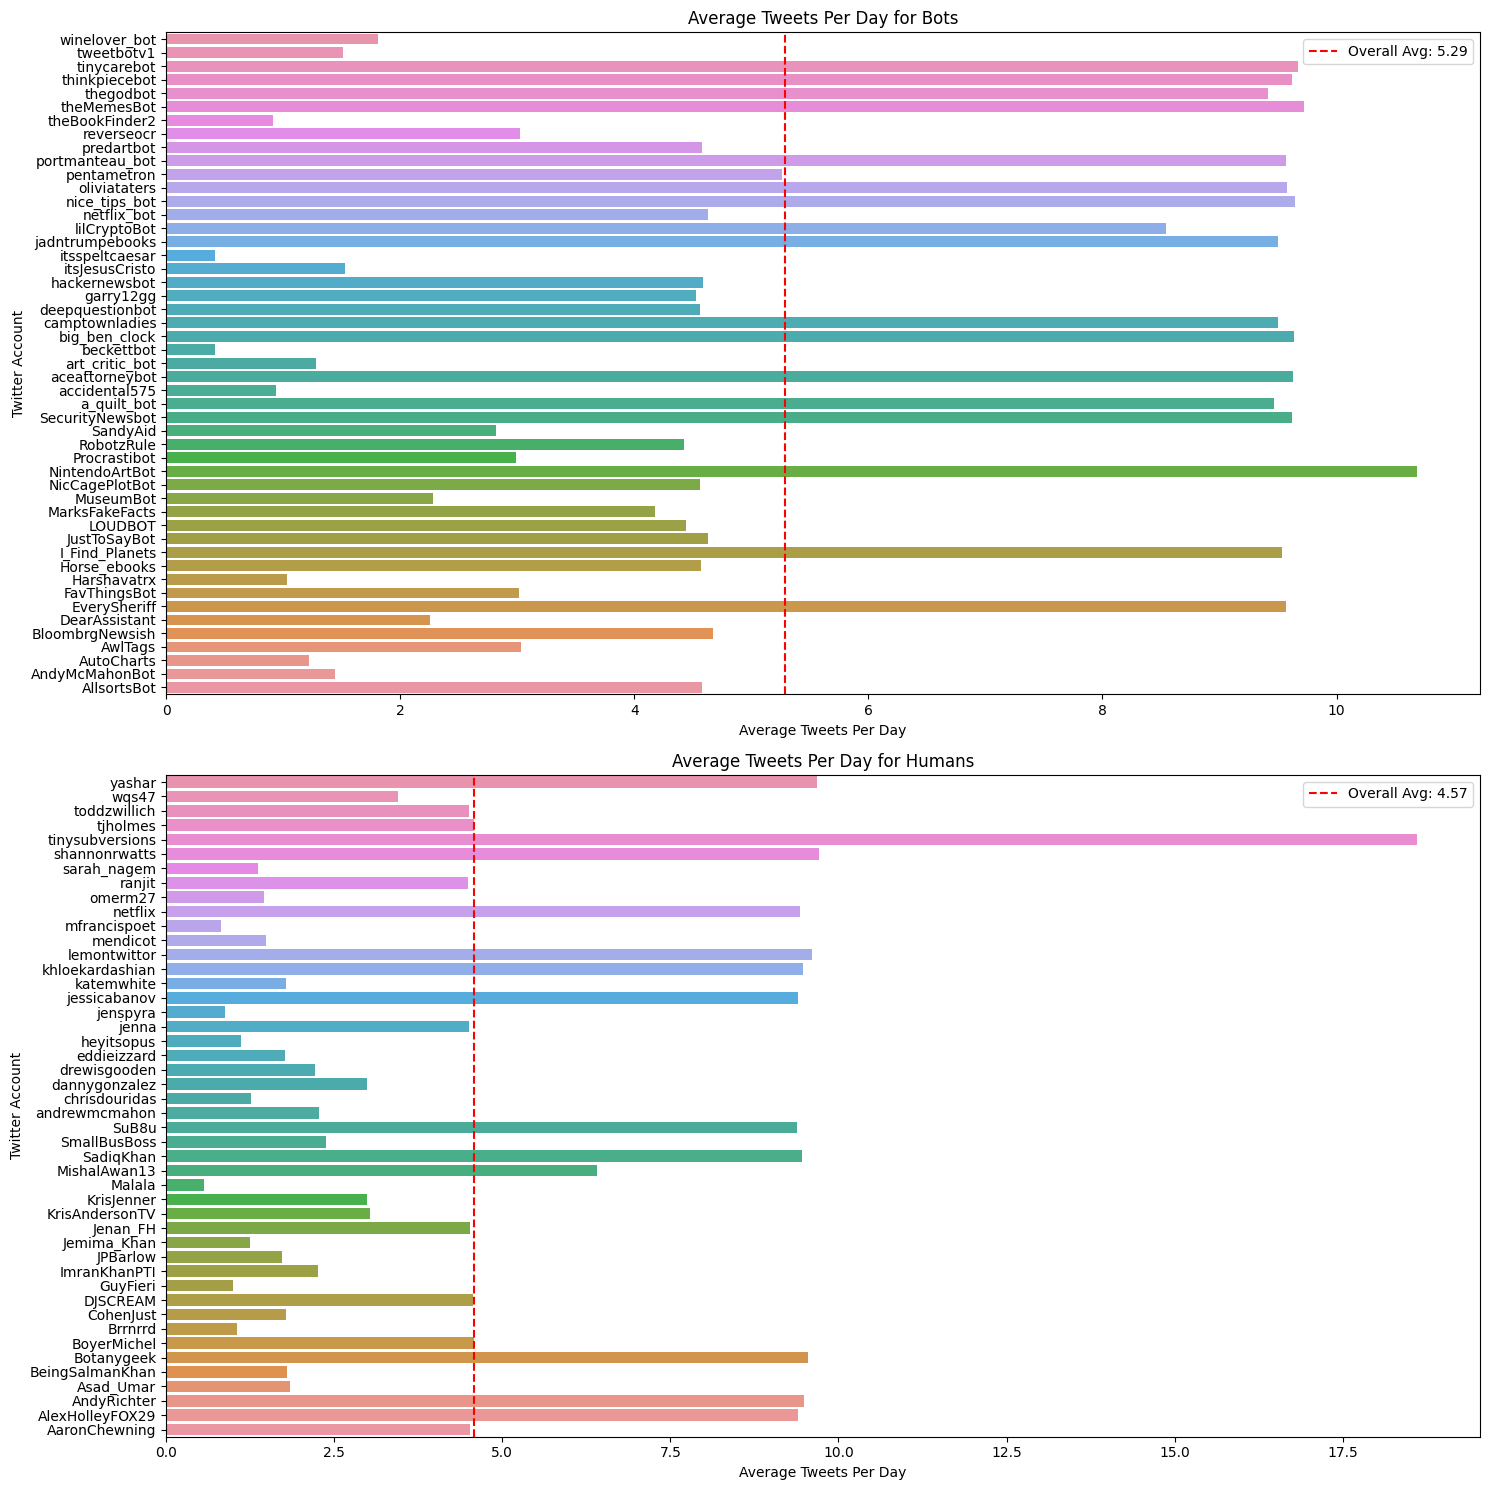

In [ ]:
# ------------------
# Avg Tweets per day
# ------------------

# Set a custom color palette for the plots
sns.set_palette("pastel")

# Separate bot and human tweets
bot_tweets = TwitterData[TwitterData['Label'] == 0]
human_tweets = TwitterData[TwitterData['Label'] == 1]
human_tweets = human_tweets[human_tweets['Twitter_Account'] != 'Asher_Wolf']   #Exception

# Group bot tweets by "Twitter_Account" and calculate the average tweet count per day
avg_bot_tweets_per_day = bot_tweets.groupby('Twitter_Account').apply(lambda group: len(group) / (group['Tweet_created_at'].max() - group['Tweet_created_at'].min()).days).reset_index(name='Avg_Bot_Tweets_Per_Day')

# Group human tweets by "Twitter_Account" and calculate the average tweet count per day
avg_human_tweets_per_day = human_tweets.groupby('Twitter_Account').apply(lambda group: len(group) / (group['Tweet_created_at'].max() - group['Tweet_created_at'].min()).days).reset_index(name='Avg_Human_Tweets_Per_Day')

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15), gridspec_kw={'height_ratios': [1, 1]})

overall_avg_bot = avg_bot_tweets_per_day['Avg_Bot_Tweets_Per_Day'].mean()
overall_avg_human = avg_human_tweets_per_day['Avg_Human_Tweets_Per_Day'].mean()

# Plot for bots
sns.barplot(data=avg_bot_tweets_per_day, y='Twitter_Account', x='Avg_Bot_Tweets_Per_Day', ax=ax1)
ax1.axvline(x=overall_avg_bot, color='red', linestyle='--', label=f'Overall Avg: {overall_avg_bot:.2f}')
ax1.set_xlabel('Average Tweets Per Day')
ax1.set_ylabel('Twitter Account')
ax1.set_title('Average Tweets Per Day for Bots')
ax1.legend()
ax1.invert_yaxis()

# Plot for humans
sns.barplot(data=avg_human_tweets_per_day, y='Twitter_Account', x='Avg_Human_Tweets_Per_Day', ax=ax2)
ax2.axvline(x=overall_avg_human, color='red', linestyle='--', label=f'Overall Avg: {overall_avg_human:.2f}')
ax2.set_xlabel('Average Tweets Per Day')
ax2.set_ylabel('Twitter Account')
ax2.set_title('Average Tweets Per Day for Humans')
ax2.legend()
ax2.invert_yaxis()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# -------------------------
# Tweet Length Distribution
# -------------------------

# Calculate tweet lengths for bots and humans
bot_tweets = TwitterData[TwitterData['Label'] == 0]
human_tweets = TwitterData[TwitterData['Label'] == 1]

bot_tweet_lengths = bot_tweets['Tweet_text'].apply(len)
human_tweet_lengths = human_tweets['Tweet_text'].apply(len)

# Create a subplot for bot tweet lengths
fig_bot = px.histogram(bot_tweet_lengths, nbins=30, title='Tweet Length Distribution for Bots', labels={'value': 'Tweet Length', 'count': 'Frequency'})
fig_bot.update_traces(marker_color='orangered')

# Create a subplot for human tweet lengths
fig_human = px.histogram(human_tweet_lengths, nbins=30, title='Tweet Length Distribution for Humans', labels={'value': 'Tweet Length', 'count': 'Frequency'})
fig_human.update_traces(marker_color='blue')

# Show the plots
fig_bot.show()
fig_human.show()


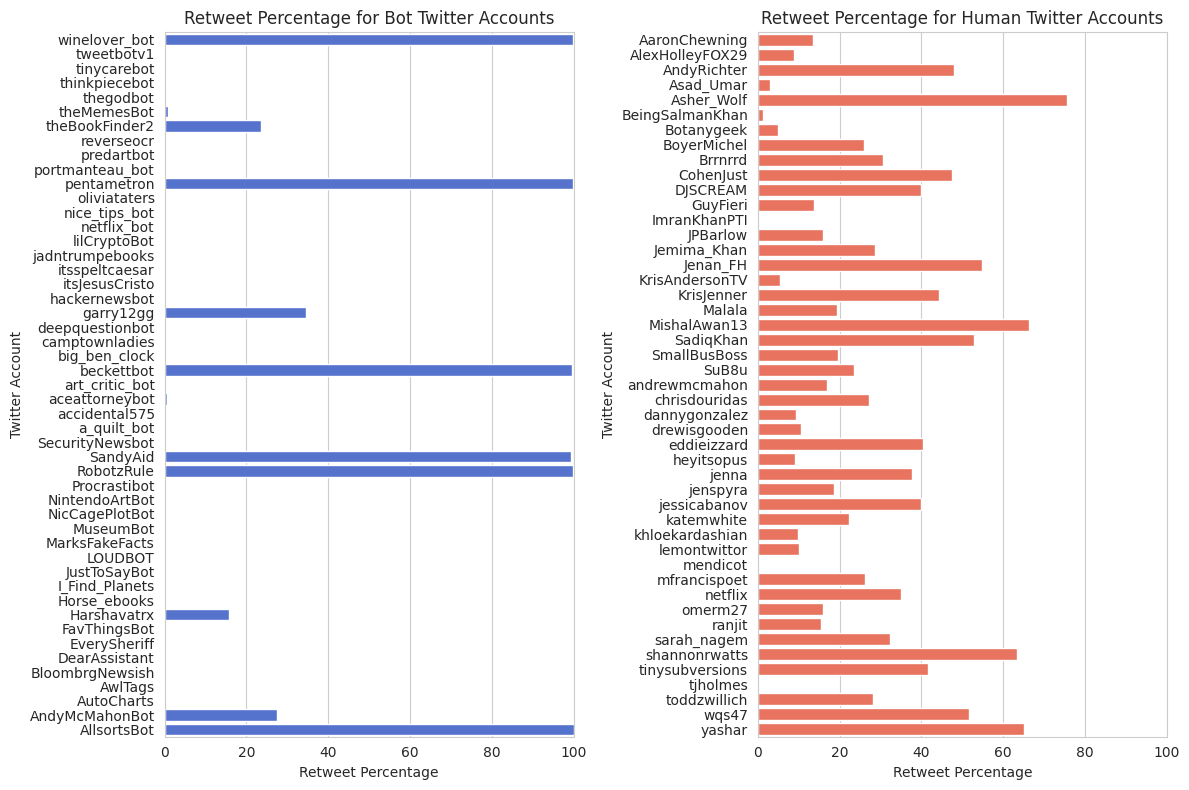

In [ ]:
# -------------------------------------------------
# What percent of each accounts tweets is a retweet
# -------------------------------------------------

# Group data by account and label, calculate the percentage of retweets for each group
account_label_retweet_percentage = TwitterData.groupby(['Label', 'Twitter_Account'])['Retweet'].apply(lambda x: (x == 1).sum() / len(x) * 100).reset_index()

# Filter data for bots and humans
bot_retweet_percentage = account_label_retweet_percentage[account_label_retweet_percentage['Label'] == 0]
human_retweet_percentage = account_label_retweet_percentage[account_label_retweet_percentage['Label'] == 1]

# Set custom colors for bots and humans
bot_color = 'royalblue'
human_color = 'tomato'

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Create the bar plot for bot accounts
sns.barplot(data=bot_retweet_percentage, x='Retweet', y='Twitter_Account', ax=ax1, color=bot_color)
ax1.set_xlabel('Retweet Percentage')
ax1.set_ylabel('Twitter Account')
ax1.set_title('Retweet Percentage for Bot Twitter Accounts')
ax1.set_xlim(0, 100)  # Limit x-axis to 0-100

# Create the bar plot for human accounts
sns.barplot(data=human_retweet_percentage, x='Retweet', y='Twitter_Account', ax=ax2, color=human_color)
ax2.set_xlabel('Retweet Percentage')
ax2.set_ylabel('Twitter Account')
ax2.set_title('Retweet Percentage for Human Twitter Accounts')
ax2.set_xlim(0, 100)  # Limit x-axis to 0-100

# Adjust spacing between account names
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=10)  # Adjust font size
ax1.invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout(pad=3)  # Increase spacing between account names

# Show the plots
plt.tight_layout()
plt.show()


Correlation between Total Tweets and Followers: 0.03


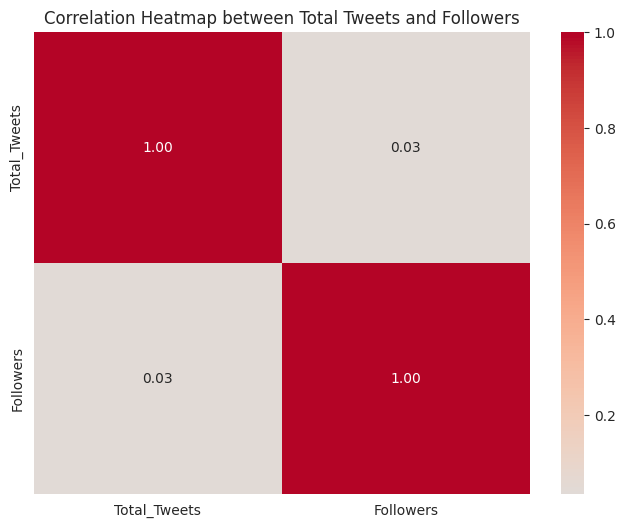

In [ ]:
# --------------------------------------
# Does more tweets mean more followers ?
# --------------------------------------

total_tweets_per_user = TwitterData['Twitter_User_Name'].value_counts()
TwitterUsers['Total_Tweets'] = TwitterUsers['Twitter_User_Name'].map(total_tweets_per_user)

# Calculate the correlation between total tweets and followers
correlation = TwitterUsers['Total_Tweets'].corr(TwitterUsers['Followers'])
print(f"\nCorrelation between Total Tweets and Followers: {correlation:.2f}")

# Calculate the correlation matrix
correlation_matrix = TwitterUsers[['Total_Tweets', 'Followers']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap between Total Tweets and Followers')
plt.show()

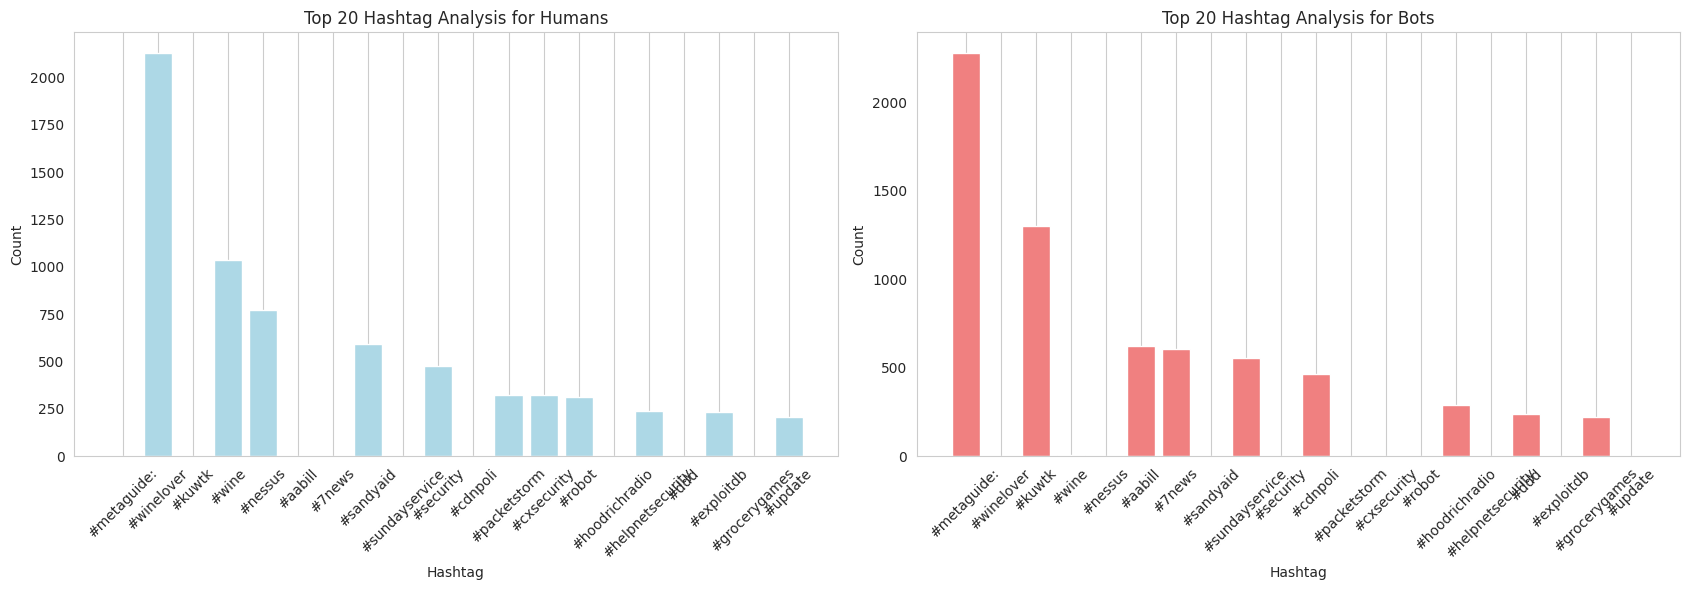

In [ ]:
# ----------------
# Hashtag Analysis
# ----------------

# Function to extract hashtags from a tweet
def extract_hashtags(tweet_text):
    hashtags = [tag.lower() for tag in tweet_text.split() if tag.startswith('#')]
    return hashtags

# Apply the function to extract hashtags from each tweet
TwitterData['Hashtags'] = TwitterData['Tweet_text'].apply(extract_hashtags)

# Count hashtags used by humans and bots
hashtag_counts = {}
for index, row in TwitterData.iterrows():
    label = row['Label']
    hashtags = row['Hashtags']
    for hashtag in hashtags:
        if hashtag not in hashtag_counts:
            hashtag_counts[hashtag] = [0, 0]
        hashtag_counts[hashtag][label] += 1

# Convert the dictionary to a DataFrame for analysis
hashtag_analysis = pd.DataFrame(hashtag_counts, index=['Humans', 'Bots']).T
hashtag_analysis.index.name = 'Hashtag'
hashtag_analysis.reset_index(inplace=True)

# Filter hashtags with count > 0
hashtag_analysis_filtered = hashtag_analysis[(hashtag_analysis['Humans'] > 0) | (hashtag_analysis['Bots'] > 0)]

# Calculate combined counts of humans and bots
hashtag_analysis['Combined'] = hashtag_analysis['Humans'] + hashtag_analysis['Bots']

# Sort by combined counts in descending order and select top 20 hashtags
top_hashtags = hashtag_analysis.nlargest(20, 'Combined')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))

# Plot for humans
ax1.bar(top_hashtags['Hashtag'], top_hashtags['Humans'], color='lightblue')
ax1.set_xlabel('Hashtag')
ax1.set_ylabel('Count')
ax1.set_title('Top 20 Hashtag Analysis for Humans')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y')

# Plot for bots
ax2.bar(top_hashtags['Hashtag'], top_hashtags['Bots'], color='lightcoral')
ax2.set_xlabel('Hashtag')
ax2.set_ylabel('Count')
ax2.set_title('Top 20 Hashtag Analysis for Bots')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

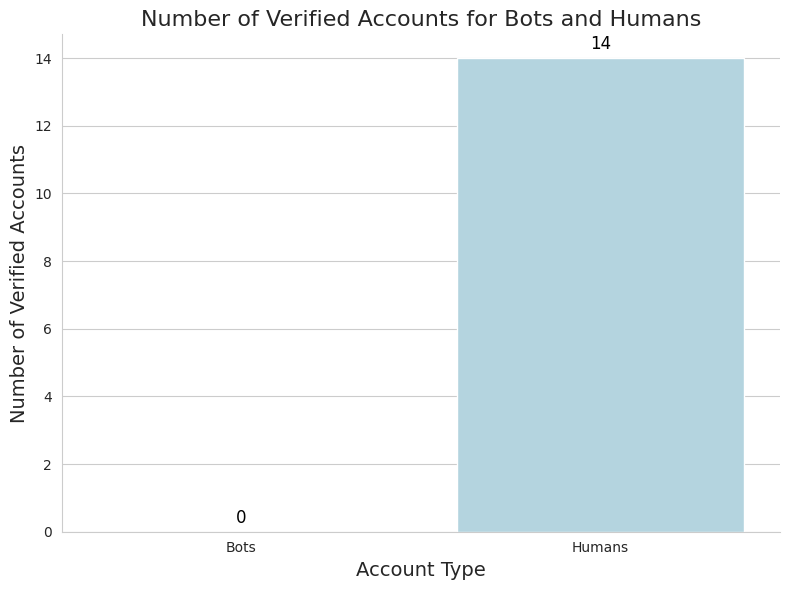

In [ ]:
# -----------------
# Verified Accounts
# -----------------

bot_data = TwitterData[TwitterData['Label'] == 0]
human_data = TwitterData[TwitterData['Label'] == 1]

# Merge TwitterData with TwitterUsers on 'Twitter_User_Name'
bot_data_merged = bot_data.merge(TwitterUsers, on='Twitter_User_Name', how='left')
human_data_merged = human_data.merge(TwitterUsers, on='Twitter_User_Name', how='left')

# Count the number of unique verified accounts for bots and humans
num_verified_bots = bot_data_merged[bot_data_merged['Verified'] == 1]['Twitter_User_Name'].nunique()
num_verified_humans = human_data_merged[human_data_merged['Verified'] == 1]['Twitter_User_Name'].nunique()

# Get the list of verified accounts for bots and humans
verified_bots = bot_data_merged[bot_data_merged['Verified'] == 1]['Twitter_User_Name'].unique()
verified_humans = human_data_merged[human_data_merged['Verified'] == 1]['Twitter_User_Name'].unique()

# Create a bar plot using seaborn
sns.set_palette("pastel")
plt.figure(figsize=(8, 6))

# Plot the data
plot = sns.barplot(x=['Bots', 'Humans'], y=[num_verified_bots, num_verified_humans], palette=['orangered', 'lightblue'])

# Add data labels on the bars
for patch in plot.patches:
    plot.annotate(format(patch.get_height(), '.0f'),
                  (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                  ha='center', va='center',
                  xytext=(0, 10), textcoords='offset points', fontsize=12, color='black')

# Set labels and title
plt.xlabel('Account Type', fontsize=14)
plt.ylabel('Number of Verified Accounts', fontsize=14)
plt.title('Number of Verified Accounts for Bots and Humans', fontsize=16)

"""# Print the list of verified accounts
print("Verified Accounts for Bots:")
for account in verified_bots:
    print(account)
print("\nVerified Accounts for Humans:")
for account in verified_humans:
    print(account)"""

# Remove the spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# -----------------
# Location Analysis
# -----------------

df = TwitterUsers.dropna()
df.reset_index(drop=True, inplace=True)
data = pd.read_csv("/content/drive/MyDrive/Datasets/TwitterData_FE.csv",error_bad_lines=False)

human_count = 0
bot_count = 0

for i in df["Twitter_User_Name"]:
  k = 0
  for j in data["Twitter_User_Name"]:
    if(i == j):
      if(data["Label"][k] == 0.0):
        bot_count += 1
        break
      else:
        human_count += 1
        break
    k += 1
print(human_count)
print(bot_count)

numbers = [human_count , bot_count]
labels = ['Human Location', 'Bot Location']

# Create a DataFrame
data = {'Count': numbers, ' ': labels}
df = pd.DataFrame(data)

colors = ['blue', 'orange']

# Create a bar graph using Plotly Express with data labels
fig = px.bar(df, x=' ', y='Count', text='Count', title='Location Count',color=colors)

# Show the graph
fig.show()

<ipython-input-18-0d12db912ec6>:7: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





32
21


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Datasets/location_data.csv')

# Create a scatter plot with latitude and longitude as markers
fig = go.Figure()

# Define a mapping from label to color
label_to_color = {
    'bot': 'red',
    'human': 'blue'
}

# Map labels to colors in the DataFrame
df['color'] = df['label'].map(label_to_color)

df['hover_text'] = '<br>Location: ' + df['Location'] + '<br>Label: ' + df['label'] + '<br>Account : ' + df['Twitter Account']

# Add scatter plot with lat and long as markers
fig.add_trace(go.Scattergeo(
    lon=df['Longitude'],
    lat=df['Latitude'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['color'],
    ),
    text=df['hover_text'],  # Location text to display on hover
))

# Update layout settings
fig.update_geos(projection_type='orthographic')
fig.update_geos(showland=True)
fig.update_layout(legend_title_text='Categories')

# Show the plot
fig.show()


# **Reading the Joined Data**

In [ ]:
TwitterData_Joined = pd.read_csv("/content/drive/MyDrive/Datasets/TwitterData_Joined.csv")
TwitterData_Joined['Real_Location'].fillna(-1, inplace=True)

# **Feature Selection**

In [ ]:
# -------------------------------------------------
# Dropping Constant features and non-numeric values
# -------------------------------------------------

TheRealData = TwitterData_Joined.copy()

TheRealData = TheRealData.select_dtypes(include=['int64', 'float64'])
constant_columns = TheRealData.columns[TheRealData.nunique() == 1]
TheRealData = TheRealData.drop(columns=constant_columns)


TheRealData

Tweet_id  Label  Word_Count  Url_Count  Retweet  Mentions_Count  \
0       8.027580e+17      0           8          2        0               0   
1       8.746920e+17      0          10          2        0               0   
2       6.983900e+17      0           6          2        0               0   
3       6.976650e+17      0           5          2        0               0   
4       6.217450e+17      0           4          2        0               0   
...              ...    ...         ...        ...      ...             ...   
279686  4.520800e+17      0           5          1        0               2   
279687  4.552820e+17      0          18          1        0               1   
279688  4.542580e+17      0          11          1        0               0   
279689  4.554850e+17      0          20          1        1               0   
279690  4.556860e+17      0           8          0        0               1   

        Hashtags_Count  QuesMark_Count  Exclamations_Count  \
0                    0               0                   0   
1                    0               0                   0   
2                    1               0                   0   
3                    0               0                   0   
4                    0               0                   0   
...                ...             ...                 ...   
279686               0               0                   0   
279687               1               0                   0   
279688               0               0                   0   
279689               0               0                   0   
279690               0               1                   0   

        SpecialCharacters_Count  ...  Pronouns_Count  Verb_Count  \
0                             0  ...               0           0   
1                             2  ...               0           0   
2                             4  ...               0           0   
3                             0  ...               0           0   
4                             3  ...               0           1   
...                         ...  ...             ...         ...   
279686                        2  ...               0           1   
279687                       12  ...               0           0   
279688                        3  ...               0           1   
279689                        7  ...               0           2   
279690                        3  ...               0           2   

        Adverb_Count  Positive_Word_Ratio  Negative_Word_Ratio  \
0                  0             0.000000               0.0000   
1                  0             0.000000               0.0000   
2                  0             0.125000               0.0000   
3                  0             0.000000               0.0000   
4                  0             0.000000               0.0000   
...              ...                  ...                  ...   
279686             0             0.111111               0.0000   
279687             0             0.037037               0.0000   
279688             0             0.187500               0.0625   
279689             1             0.074074               0.0000   
279690             0             0.090909               0.0000   

        Neutral_Word_Ratio  Following  Followers  Verified  Real_Location  
0                 1.000000          0       7816         0           -1.0  
1                 1.000000          0       7816         0           -1.0  
2                 0.875000          0       7816         0           -1.0  
3                 1.000000          0       7816         0           -1.0  
4                 1.000000          0       7816         0           -1.0  
...                    ...        ...        ...       ...            ...  
279686            0.888889        383         65         0           -1.0  
279687            0.962963        383         65         0           -1.0  
279688            0.7500

In [ ]:
# --------------------------------------------------------------------------
# Moving the Label Column to the last and then rearranging the data randomly
# --------------------------------------------------------------------------

# Also dropping suspended accounts

label_column = TheRealData['Label']
TheRealData = TheRealData.drop(columns=['Label'])
TheRealData['Label'] = label_column

TheRealData = TheRealData.sample(frac=1, random_state=42).reset_index(drop=True)
TheRealData = TheRealData[TheRealData['Verified'] != -1]

TheRealData

Tweet_id  Word_Count  Url_Count  Retweet  Mentions_Count  \
0       9.970470e+17          19          1        0               1   
2       9.170760e+17          17          0        0               1   
3       8.589190e+17           4          1        0               0   
5       1.070560e+18          18          0        1               1   
6       3.160610e+17           9          0        0               0   
...              ...         ...        ...      ...             ...   
279684  1.007650e+18           3          1        0               2   
279686  8.974390e+17          14          1        0               0   
279687  1.013890e+18          17          1        1               0   
279688  8.159600e+17          10          1        0               0   
279690  7.796990e+17          11          0        1               0   

        Hashtags_Count  QuesMark_Count  Exclamations_Count  \
0                    0               0                   0   
2                    0               0                   0   
3                    0               1                   0   
5                    1               0                   1   
6                    0               0                   0   
...                ...             ...                 ...   
279684               0               0                   0   
279686               0               0                   0   
279687               1               0                   0   
279688               0               1                   0   
279690               0               0                   0   

        SpecialCharacters_Count  Nouns_Count  ...  Verb_Count  Adverb_Count  \
0                             2            7  ...           3             1   
2                             4            4  ...           4             1   
3                             4            4  ...           0             0   
5                             8            8  ...           3             1   
6                             2            5  ...           1             0   
...                         ...          ...  ...         ...           ...   
279684                        2            6  ...           0             0   
279686                        7           10  ...           0             0   
279687                        5            9  ...           3             1   
279688                        1            6  ...           0             0   
279690                        4            5  ...           2             1   

        Positive_Word_Ratio  Negative_Word_Ratio  Neutral_Word_Ratio  \
0                  0.086957             0.000000            0.913043   
2                  0.095238             0.047619            0.857143   
3                  0.000000             0.000000            1.000000   
5                  0.076923             0.000000            0.923077   
6                  0.090909             0.000000            0.909091   
...                     ...                  ...                 ...   
279684             0.000000             0.000000            1.000000   
279686             0.000000             0.050000            0.950000   
279687             0.041667             0.000000            0.958333   
279688             0.153846             0.000000            0.846154   
279690             0.000000             0.066667            0.933333   

        Following  Followers  Verified  Real_Location  Label  
0           20500      30100         0            1.0      1  
2             428      11800         0            1.0      1  
3               0      23700         0            0.0      0  
5           55000      75700         0            1.0      1  
6              75        241         0           -1.0      0  
...           ...        ...       ...            ...    ...  
279684       1404      41400         0            1.0      1  
279686          1       5398         0            1.0      0  
279687       3053    

In [ ]:
# ----------------------------------------------------------------
# Checking if there is any Constant column using VarianceThreshold
# ----------------------------------------------------------------

var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(TheRealData)
var_thres.get_support()

# Drop if any
# -----------

# data.columns[var_thres.get_support()]
# constant_columns = [column for column in data.columns if column not in data.columns[var_thres.get_support()]]
# data.drop(constant_columns,axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
TheRealData.corr()

Tweet_id  Word_Count  Url_Count   Retweet  \
Tweet_id                 1.000000    0.038629   0.155363  0.034920   
Word_Count               0.038629    1.000000  -0.105159  0.240241   
Url_Count                0.155363   -0.105159   1.000000 -0.015541   
Retweet                  0.034920    0.240241  -0.015541  1.000000   
Mentions_Count           0.026515    0.011581  -0.090858  0.015503   
Hashtags_Count          -0.014033    0.082947   0.120872  0.212125   
QuesMark_Count           0.019365    0.055930  -0.088685 -0.014145   
Exclamations_Count       0.028633    0.071719  -0.025774  0.011697   
SpecialCharacters_Count  0.078772    0.184380  -0.015977  0.021379   
Nouns_Count              0.010141    0.580203   0.164701  0.345029   
Pronouns_Count           0.024045    0.061849  -0.003949  0.030545   
Verb_Count               0.052767    0.647339  -0.132973  0.129857   
Adverb_Count             0.031769    0.273638  -0.103582  0.051942   
Positive_Word_Ratio     -0.002546   -0.000357  -0.150000 -0.044311   
Negative_Word_Ratio     -0.003792    0.074431  -0.077587 -0.004202   
Neutral_Word_Ratio       0.004242   -0.040363   0.170227  0.040059   
Following                0.162157    0.113463  -0.023578  0.157335   
Followers               -0.042031    0.109463   0.080167 -0.037805   
Verified                 0.022123    0.163766   0.059489  0.077356   
Real_Location            0.050343    0.192728   0.050168  0.094737   
Label                    0.203033    0.233787   0.096545  0.142643   

                         Mentions_Count  Hashtags_Count  QuesMark_Count  \
Tweet_id                       0.026515       -0.014033        0.019365   
Word_Count                     0.011581        0.082947        0.055930   
Url_Count                     -0.090858        0.120872       -0.088685   
Retweet                        0.015503        0.212125       -0.014145   
Mentions_Count                 1.000000        0.040166       -0.027270   
Hashtags_Count                 0.040166        1.000000       -0.009308   
QuesMark_Count                -0.027270       -0.009308        1.000000   
Exclamations_Count             0.087379        0.066056        0.001916   
SpecialCharacters_Count       -0.027408        0.035583       -0.015608   
Nouns_Count                    0.204815        0.180443       -0.050148   
Pronouns_Count                 0.001816        0.013618        0.009074   
Verb_Count                     0.050597       -0.009447        0.045901   
Adverb_Count                   0.018818        0.033715        0.051955   
Positive_Word_Ratio            0.033150       -0.030391       -0.037006   
Negative_Word_Ratio           -0.071735       -0.042603       -0.010937   
Neutral_Word_Ratio             0.010942        0.049177        0.037514   
Following                      0.104627        0.080038       -0.017643   
Followers                      0.048736        0.002445       -0.026180   
Verified                       0.178524        0.024523       -0.037428   
Real_Location                  0.176450        0.107446       -0.032247   
Label                          0.287019        0.032090       -0.017602   

                         Exclamations_Count  SpecialCharacters_Count  \
Tweet_id                           0.028633                 0.078772   
Word_Count                         0.071719                 0.184380   
Url_Count                         -0.025774                -0.015977   
Retweet                            0.011697                 0.021379   
Mentions_Count                     0.087379                -0.027408   
Hashtags_Count                     0.066056                 0.035583   
QuesMark_Count                     0.001916                -0.015608   
Exclamations_Count                 1.000000                 0.003970   
SpecialCharacters_Count            0.003970                 1.000000   
Nouns_Count                        0.043259                 0.458495   
Pronouns_Count                     0.0256

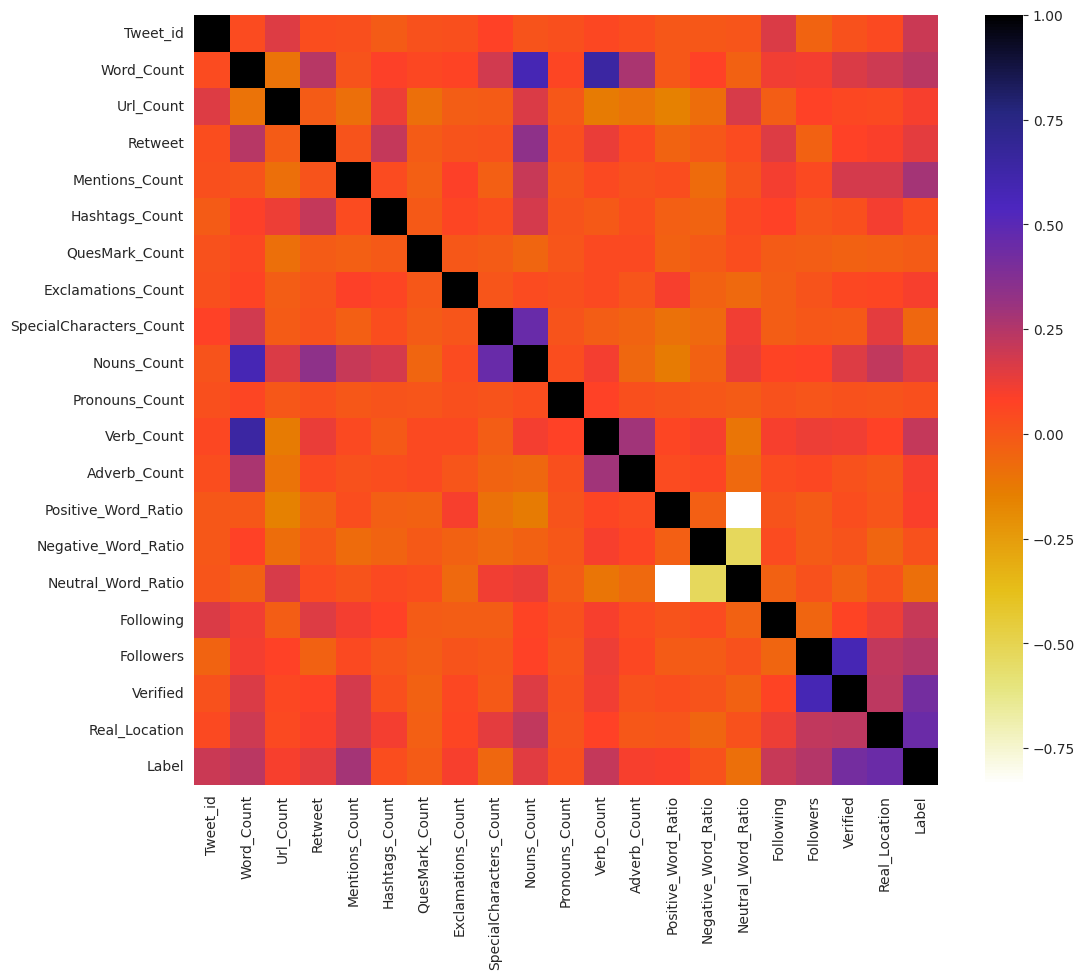

In [ ]:
# -------------------------
# Removing multicolinearity
# -------------------------

plt.figure(figsize=(12,10))
cor = TheRealData.corr()
sns.heatmap(cor, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# --------------------------------------------
# Identifying Multicolinearity in the features
# --------------------------------------------

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


corr_features = correlation(TheRealData, 0.75)
print(corr_features)
TheRealData.drop(corr_features, axis=1)
TheRealData

{'Neutral_Word_Ratio'}


Tweet_id  Word_Count  Url_Count  Retweet  Mentions_Count  \
0       9.970470e+17          19          1        0               1   
2       9.170760e+17          17          0        0               1   
3       8.589190e+17           4          1        0               0   
5       1.070560e+18          18          0        1               1   
6       3.160610e+17           9          0        0               0   
...              ...         ...        ...      ...             ...   
279684  1.007650e+18           3          1        0               2   
279686  8.974390e+17          14          1        0               0   
279687  1.013890e+18          17          1        1               0   
279688  8.159600e+17          10          1        0               0   
279690  7.796990e+17          11          0        1               0   

        Hashtags_Count  QuesMark_Count  Exclamations_Count  \
0                    0               0                   0   
2                    0               0                   0   
3                    0               1                   0   
5                    1               0                   1   
6                    0               0                   0   
...                ...             ...                 ...   
279684               0               0                   0   
279686               0               0                   0   
279687               1               0                   0   
279688               0               1                   0   
279690               0               0                   0   

        SpecialCharacters_Count  Nouns_Count  ...  Verb_Count  Adverb_Count  \
0                             2            7  ...           3             1   
2                             4            4  ...           4             1   
3                             4            4  ...           0             0   
5                             8            8  ...           3             1   
6                             2            5  ...           1             0   
...                         ...          ...  ...         ...           ...   
279684                        2            6  ...           0             0   
279686                        7           10  ...           0             0   
279687                        5            9  ...           3             1   
279688                        1            6  ...           0             0   
279690                        4            5  ...           2             1   

        Positive_Word_Ratio  Negative_Word_Ratio  Neutral_Word_Ratio  \
0                  0.086957             0.000000            0.913043   
2                  0.095238             0.047619            0.857143   
3                  0.000000             0.000000            1.000000   
5                  0.076923             0.000000            0.923077   
6                  0.090909             0.000000            0.909091   
...                     ...                  ...                 ...   
279684             0.000000             0.000000            1.000000   
279686             0.000000             0.050000            0.950000   
279687             0.041667             0.000000            0.958333   
279688             0.153846             0.000000            0.846154   
279690             0.000000             0.066667            0.933333   

        Following  Followers  Verified  Real_Location  Label  
0           20500      30100         0            1.0      1  
2             428      11800         0            1.0      1  
3               0      23700         0            0.0      0  
5           55000      75700         0            1.0      1  
6              75        241         0           -1.0      0  
...           ...        ...       ...            ...    ...  
279684       1404      41400         0            1.0      1  
279686          1       5398         0            1.0      0  
279687       3053    

In [ ]:
"""
TheRealData = TheRealData.drop(columns=['Tweet_id'])
TheRealData
"""

"\nTheRealData = TheRealData.drop(columns=['Tweet_id'])\nTheRealData\n"

Followers                  0.692985
Following                  0.565333
Tweet_id                   0.179402
Real_Location              0.173100
Verified                   0.123049
SpecialCharacters_Count    0.061368
Mentions_Count             0.060904
Word_Count                 0.042062
Neutral_Word_Ratio         0.036987
Nouns_Count                0.034309
Verb_Count                 0.033569
Positive_Word_Ratio        0.024386
Negative_Word_Ratio        0.013674
Hashtags_Count             0.012959
Retweet                    0.012713
Url_Count                  0.012366
Exclamations_Count         0.010625
Adverb_Count               0.008323
QuesMark_Count             0.002420
Pronouns_Count             0.000816
dtype: float64


<Axes: >

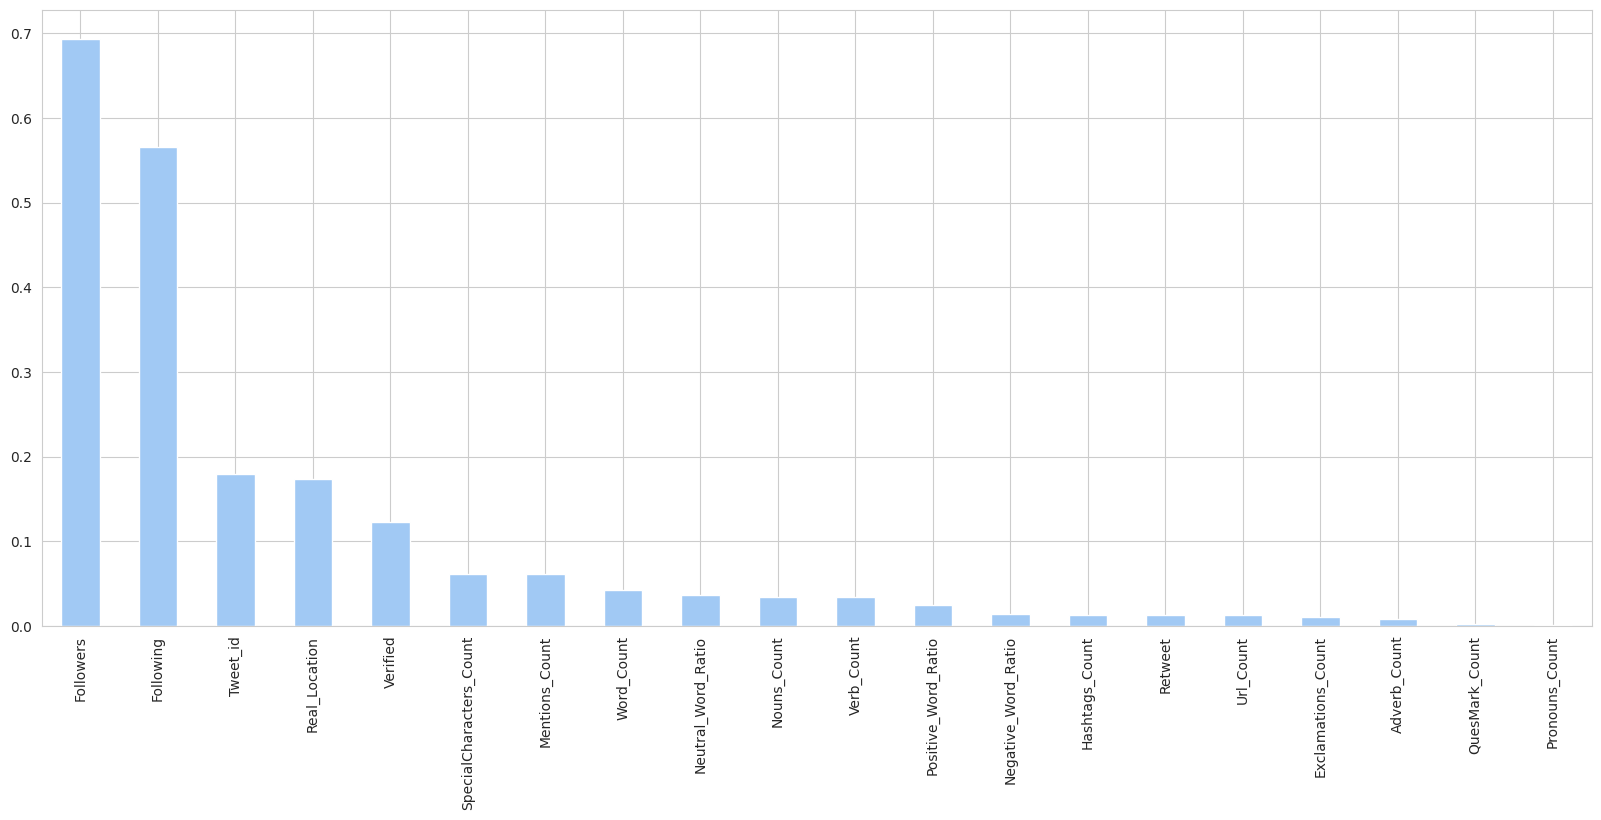

In [ ]:
TheRealData['Real_Location'].fillna(-1, inplace=True)

X = TheRealData.drop(columns=['Label'])
y = TheRealData['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

mutual_info = mutual_info_classif(X_train, y_train)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
print(mutual_info.sort_values(ascending=False))

mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
Top5Features = X_train.columns[sel_five_cols.get_support()]
Top5Features

Index(['Tweet_id', 'Following', 'Followers', 'Verified', 'Real_Location'], dtype='object')

# **Prediction**

In [ ]:
# ------------
# RandomForest
# ------------

user_features = TwitterData_Joined[['Followers', 'Following', 'Verified', 'Real_Location']]
tweet_text = TwitterData_Joined['Tweet_text']

y = TwitterData_Joined['Label']
X_train_user, X_test_user, X_train_text, X_test_text, y_train, y_test = train_test_split( user_features, tweet_text, y, test_size=0.3, random_state=42)

# Text Vectorization with TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_text_tfidf = vectorizer.fit_transform(X_train_text)
X_test_text_tfidf = vectorizer.transform(X_test_text)

# Combining Features
X_train = hstack((X_train_user.values, X_train_text_tfidf))
X_test = hstack((X_test_user.values, X_test_text_tfidf))

# Train a Classifier (Random Forest)
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make Predictions
y_pred = classifier.predict(X_test)
results_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
# -------------
# MultinomialNB
# -------------

X_train, X_test, y_train, y_test = train_test_split(TwitterData['Tweet_text'], TwitterData['Label'], test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(max_features=30000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.85126


In [ ]:
# -----------
# LogisticReg
# -----------

# Assuming you have a DataFrame called 'TwitterData' with 'Tweet_text' and 'Label' columns
X = TwitterData['Tweet_text']
y = TwitterData['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Transform the text data into TF-IDF features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


In [ ]:
# -----------
# Prediticion
# -----------


# Input tweet to be classified
input_tweet = ["Hi i am a bot and i tweeted this !"]

# Transform the input tweet using the trained TF-IDF vectorizer
input_tweet_tfidf = vectorizer.transform(input_tweet)

# Use the trained classifier to predict if it's from a bot or not
predicted_label = classifier.predict(input_tweet_tfidf)

# Print the prediction result
if predicted_label[0] == 0:
    print("The input tweet is predicted to be from a bot.")
else:
    print("The input tweet is predicted to be from a human.")


The input tweet is predicted to be from a bot.


# **LSH using Tweets**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/TwitterData_FE.csv")

X = df.drop(columns=['Label'])
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# The preprocess function takes a string of text as input and returns a list of individual tokens.
# It does this by converting the text to lowercase and then using the nltk library's word_tokenize function to split the text into tokens based on whitespace.
def preprocess(text):
    return nltk.word_tokenize(text.lower())

In [ ]:
# This is the number of permutations to be used in the MinHash algorithm. The higher the number, the more accurate the results, but also the more computational resources required.
permutations = 512

# This is the number of recommendations to return when querying the forest.
num_recommendations = 5

In [ ]:
# The get_forest function takes a dataframe, the number of permutations, and builds a MinHash LSH Forest.
# This forest can then be used to query for similar items.
def get_forest(data, perms):
    start_time = time.time()

    # Initialize an empty list to store the MinHash objects.
    minhash = []

    # For each text in the data, preprocess the text into tokens and create a MinHash object.
    for text in data['Tweet_text']:
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)

    # Create a MinHash LSH Forest with the specified number of permutations.
    forest = MinHashLSHForest(num_perm=perms)

    # Add each MinHash object to the forest.
    for i,m in enumerate(minhash):
        forest.add(i,m)

    # Build the forest.
    forest.index()

    print('\n\nIt took %s seconds to build forest.' %(time.time()-start_time))
    print(forest)

    return forest

In [ ]:
# The predict function takes a text, a database, the number of permutations, the number of results to return, and a MinHash LSH Forest.
# It returns the top num_results items from the database that are most similar to the input text.
def predict(text, database, perms, num_results, forest):

    # Preprocess the text into tokens and create a MinHash object.
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))

    # Query the forest for the top num_results items similar to the MinHash object.
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if your query is empty, return none

    # Get the text of the top results from the database.
    result = database.iloc[idx_array]["Tweet_text"]

    return result

In [ ]:
# Function to generate MinHash values for a given text
def get_minhash(text, perms):
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
    return m

In [ ]:
# Generate MinHash values for the entire training set
X_train_minhash = np.array([get_minhash(text, permutations) for text in X_train['Tweet_text']])
# Generate MinHash values for the entire test set
X_test_minhash = np.array([get_minhash(text, permutations) for text in X_test['Tweet_text']])

In [ ]:
# Build the MinHash LSH Forest using the training data and the specified number of permutations.
forest = get_forest(X_train, permutations)



It took 1266.889748096466 seconds to build forest.


In [ ]:
# Query the forest for the top num_recommendations items similar to the input title.
title = "Hi there ! I love to cook !"
result = predict(title, X_train, permutations, num_recommendations, forest)

print("\n")
print('=====================================')
print('Top Recommendation(s):')
print('=====================================')
print("\n")

# Print out the top recommendations.
for index in result.index:
    print(f'Recommendation {index + 1}:')
    print('Label: ', TwitterData.loc[index]["Label"])
    print('Username: ', X_train.loc[index]["Twitter_User_Name"])
    print('Tweet: ', X_train.loc[index]["Tweet_text"])
    print('-------------------------------------')



Top Recommendation(s):


Recommendation 21366:
Label:  0
Username:  #winelover bot
Tweet:  RT @TheWineHub: hi #winelover! Do U love #Chablis? I do! @purechablis @JamesTheWineGuy @enobytes @Shoshi @myvinespot @winecompass @womenwho\xe2\x80\xa6
-------------------------------------
Recommendation 77603:
Label:  0
Username:  here's your reminder
Tweet:  @erik316wttn here's a personal reminder for u: \xf0\x9f\x92\x99: dont forget to say hi to your friends please! i love u!!
-------------------------------------
Recommendation 123779:
Label:  0
Username:  Pentametron
Tweet:  RT @WIAMRadio: Now playing: Heroes by Amanda Cook
-------------------------------------
Recommendation 231282:
Label:  0
Username:  Robots Rule
Tweet:  RT @business: No time to cook the perfect curry? This startup has a robotic solution https://t.co/zhe6nRRCyn https://t.co/iwjDzJTF7v
-------------------------------------
Recommendation 282731:
Label:  0
Username:  Hacker News Bot
Tweet:  Cook Says Apple Is Focusing on

In [ ]:
start_time = time.time()

# Initialize lists to store predictions and ground truth labels
predictions = []
ground_truth = []

# Lists to store details of each prediction
predicted_tweets = []
true_labels = []

i = 0

# Iterate through the test set
for idx, row in X_test.iterrows():

    tweet_text = row['Tweet_text']
    label = y_test.loc[idx]

    # Query the forest for the top num_recommendations items similar to the input tweet text.
    result = predict(tweet_text, X_train, permutations, num_recommendations, forest)

    # If no recommendations were found, skip this example
    if result is None:
        continue

    # Count the occurrences of 0 (bot) and 1 (human) in the recommendations
    recommendation_counts = Counter([TwitterData.loc[index]["Label"] for index in result.index])

    # Predict the label based on the majority vote
    if recommendation_counts[0] > recommendation_counts[1]:
        predicted_label = 0  # Bot
    else:
        predicted_label = 1  # Human

    # Append the predicted label and ground truth label to the respective lists
    predictions.append(predicted_label)
    ground_truth.append(label)

    # Store details of the prediction
    predicted_tweets.append(tweet_text)
    true_labels.append(label)

    if i%1000 == 0:
      print("Predicting Tweet",i)

    i += 1

# Calculate accuracy
accuracy = accuracy_score(ground_truth, predictions)

# Print the details of each prediction where the prediction is incorrect
for i in range(len(predicted_tweets)):
    if predictions[i] != true_labels[i]:
        print("Predicted Tweet:", predicted_tweets[i])
        print("True Label:", true_labels[i])
        print("Predicted Label:", predictions[i])
        print("------------------------------")

print(f'\n\nAccuracy: {accuracy:.2f}')

elapsed_time = time.time() - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
print(f'It took {minutes} minutes and {seconds} seconds to complete the prediction.')

Streaming output truncated to the last 5000 lines.
Predicted Tweet: RT @golan: .@zenlev Cute walrus making unusual noises https://t.co/d739Vnb3l1
True Label: 1
Predicted Label: 0
------------------------------
Predicted Tweet: Every two years, was also responsible for recording onto compact audio cassettes, and could run on the Vietnam War era.
True Label: 0
Predicted Label: 1
------------------------------
Predicted Tweet: Extracting my data from the Hello Sense sleep tracker... https://t.co/GJcVGhxYf2
True Label: 0
Predicted Label: 1
------------------------------
Predicted Tweet: Hey @MJArmstrongs my friend @LBoschie and I have heard you are closed... IS THIS TRUE!?!?! #WHY
True Label: 0
Predicted Label: 1
------------------------------
Predicted Tweet: RT @TheWineHub: "The two most important days in your life are the day you were born, and the day you find out why.\xe2\x80\x9d \nMark Twain, #LifeLover\xe2\x80\xa6
True Label: 0
Predicted Label: 1
------------------------------
Predi

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from datasketch import MinHashLSHForest, MinHash
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Index all MinHash values in the forest
forest = MinHashLSHForest(num_perm=512)
for i, minhash in enumerate(X_train_minhash):
    forest.add(i, minhash)
forest.index()

# Pickle the MinHash LSH Forest model
joblib.dump(forest, '/content/drive/MyDrive/Models/LSHForest_Tweets.joblib')

X_train.to_csv('/content/drive/MyDrive/Datasets/X_Train_Tweets.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/Datasets/X_Test_Tweets.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/Datasets/y_Train_Tweets.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/Datasets/y_Test_Tweets.csv', index=False)


# Query the forest for the top k most similar items
k = 7
test_predictions = []
xyz = 0
for query_minhash in X_test_minhash:
    print(xyz)
    xyz += 1
    neighbors = forest.query(query_minhash, k)

    # Convert the indices to the corresponding indices in y_train
    neighbor_labels = [y_train.iloc[i] for i in neighbors]

    if len(neighbors) == 0:
      test_predictions.append(0)
      continue

    # Use k-NN classifier to predict the label based on neighbors
    prediction = max(set(neighbor_labels), key=neighbor_labels.count)
    test_predictions.append(prediction)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

Streaming output truncated to the last 5000 lines.
68158
68159
68160
68161
68162
68163
68164
68165
68166
68167
68168
68169
68170
68171
68172
68173
68174
68175
68176
68177
68178
68179
68180
68181
68182
68183
68184
68185
68186
68187
68188
68189
68190
68191
68192
68193
68194
68195
68196
68197
68198
68199
68200
68201
68202
68203
68204
68205
68206
68207
68208
68209
68210
68211
68212
68213
68214
68215
68216
68217
68218
68219
68220
68221
68222
68223
68224
68225
68226
68227
68228
68229
68230
68231
68232
68233
68234
68235
68236
68237
68238
68239
68240
68241
68242
68243
68244
68245
68246
68247
68248
68249
68250
68251
68252
68253
68254
68255
68256
68257
68258
68259
68260
68261
68262
68263
68264
68265
68266
68267
68268
68269
68270
68271
68272
68273
68274
68275
68276
68277
68278
68279
68280
68281
68282
68283
68284
68285
68286
68287
68288
68289
68290
68291
68292
68293
68294
68295
68296
68297
68298
68299
68300
68301
68302
68303
68304
68305
68306
68307
68308
68309
68310
68311
68312
68313
68314
68315
6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.model_selection import KFold

df = pd.read_csv("/content/drive/MyDrive/Datasets/TwitterData_FE.csv")

X = df.drop(columns=['Label'])
y = df['Label']

# Number of permutations and recommendations
permutations = 256
num_recommendations = 5

# The get_forest function takes a dataframe, the number of permutations, and builds a MinHash LSH Forest.
# This forest can then be used to query for similar items.
def get_forest(data, perms):
    start_time = time.time()

    # Initialize an empty list to store the MinHash objects.
    minhash = []

    # For each text in the data, preprocess the text into tokens and create a MinHash object.
    for text in data['Tweet_text']:
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)

    # Create a MinHash LSH Forest with the specified number of permutations.
    forest = MinHashLSHForest(num_perm=perms)

    # Add each MinHash object to the forest.
    for i,m in enumerate(minhash):
        forest.add(i,m)

    # Build the forest.
    forest.index()

    print('\n\nIt took %s seconds to build forest.' %(time.time()-start_time))
    print(forest)

    return forest
# The predict function takes a text, a database, the number of permutations, the number of results to return, and a MinHash LSH Forest.
# It returns the top num_results items from the database that are most similar to the input text.
def predict(database, text, perms, num_results, forest):

    # Preprocess the text into tokens and create a MinHash object.
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))

    # Query the forest for the top num_results items similar to the MinHash object.
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if your query is empty, return none

    # Get the text of the top results from the database.
    result = database.iloc[idx_array]["Tweet_text"]

    return result
"""
# Build the MinHash LSH Forest using the training data and the specified number of permutations.
forest = get_forest(X, permutations)
"""
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build the MinHash LSH Forest using the training data and the specified number of permutations.
    forest = get_forest(X_train, permutations)

    # Initialize lists to store predictions and ground truth labels
    predictions = []
    ground_truth = []

    # Iterate through the test set
    for idx, row in X_test.iterrows():
        tweet_text = row['Tweet_text']
        label = y_test.loc[idx]

        # Query the forest for the top num_recommendations items similar to the input tweet text.
        result = predict(X_train, tweet_text, permutations, num_recommendations, forest)

        # If no recommendations were found, skip this example
        if result is None:
            continue

        # Count the occurrences of 0 (bot) and 1 (human) in the recommendations
        recommendation_counts = Counter([TwitterData.loc[index]["Label"] for index in result.index])

        # Predict the label based on the majority vote
        if recommendation_counts[0] >= recommendation_counts[1]:
            predicted_label = 0  # Bot
        else:
            predicted_label = 1  # Human

        # Append the predicted label and ground truth label to the respective lists
        predictions.append(predicted_label)
        ground_truth.append(label)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(ground_truth, predictions)
    accuracy_scores.append(fold_accuracy)

    print(f'Accuracy for current fold: {fold_accuracy}')

# Print overall cross-validated accuracy
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f'Mean accuracy across folds: {mean_accuracy:.2f}')
print(f'Standard deviation of accuracy: {std_accuracy:.2f}')



It took 488.5262315273285 seconds to build forest.
Accuracy for current fold: 0.7957955368537233


It took 478.77846002578735 seconds to build forest.
Accuracy for current fold: 0.7986690573063927


It took 488.6619863510132 seconds to build forest.
Accuracy for current fold: 0.7974930170005863


It took 479.9415225982666 seconds to build forest.
Accuracy for current fold: 0.794921740329587


It took 481.40772700309753 seconds to build forest.
Accuracy for current fold: 0.8007959204768632
Mean accuracy across folds: 0.80
Standard deviation of accuracy: 0.00


# **LSH using Followers and Following**

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/TwitterData_Joined.csv", encoding='latin1')

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Extract the relevant columns ('Followers' and 'Following') as data for LSH
data_for_lsh = df[['Followers', 'Following']].fillna(0).astype(int)

# Split the dataset into features (X) and labels (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of permutations for MinHash
permutations = 256

# Number of recommendations to return when querying the forest
num_recommendations = 5

In [ ]:
# Function to build the MinHash LSH Forest
def get_forest(data, perms):
    start_time = time.time()

    # Initialize an empty list to store the MinHash objects
    minhash = []

    # For each data point, create a MinHash object
    for _, row in data.iterrows():
        follower_value = row['Followers']
        following_value = row['Following']

        # Create a MinHash object for the combination of followers and following counts
        m = MinHash(num_perm=perms)
        m.update(f"{follower_value}_{following_value}".encode('utf8'))
        minhash.append(m)

    # Create a MinHash LSH Forest with the specified number of permutations
    forest = MinHashLSHForest(num_perm=perms)

    # Add each MinHash object to the forest
    for i, m in enumerate(minhash):
        forest.add(i, m)

    # Build the forest
    forest.index()

    print('It took %s seconds to build the forest.' % (time.time() - start_time))
    print(forest)

    return forest

In [ ]:
# Function to predict similar users based on input user behavior metrics
def predict(follower_count, following_count, database, perms, num_results, forest):

    # Create a MinHash object for the combination of followers and following counts
    m = MinHash(num_perm=perms)
    m.update(f"{follower_count}_{following_count}".encode('utf8'))

    # Query the forest for the top num_results items similar to the MinHash object
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # If the query is empty, return None

    # Get the user behavior metrics of the top results from the database
    result = database.iloc[idx_array]

    return result

In [ ]:
# Build the MinHash LSH Forest using the user behavior metric data and the specified number of permutations
forest = get_forest(data_for_lsh, permutations)

It took 791.6243646144867 seconds to build the forest.


In [ ]:
# Initialize lists to store predictions and ground truth labels
predictions = []
ground_truth = []

# Lists to store details of each prediction
predicted_metrics = []
true_labels = []

i = 0

# Iterate through the test set
for idx, row in X_test.iterrows():

    follower_count = row['Followers']
    following_count = row['Following']
    label = y_test.loc[idx]

    # Query the forest for the top num_recommendations items similar to the input user behavior metrics
    result = predict(follower_count, following_count, data_for_lsh, permutations, num_recommendations, forest)

    # If no recommendations were found, skip this example
    if result is None:
        continue

    # Count the occurrences of 0 (bot) and 1 (human) labels in the recommendations
    recommendation_counts = Counter([TwitterData.loc[index]["Label"] for index in result.index])

    # Predict the label based on the majority vote
    if recommendation_counts[0] > recommendation_counts[1]:
        predicted_label = 0 # Bot
    else:
        predicted_label = 1 # Human

    # Append the predicted label and ground truth label to the respective lists
    predictions.append(predicted_label)
    ground_truth.append(label)

    # Store details of the prediction
    predicted_metrics.append((follower_count, following_count))
    true_labels.append(label)

    if i % 1000 == 0:
        print("Predicting User", i)

    i += 1

# Print the details of each prediction where the prediction is incorrect
for i in range(len(predicted_metrics)):
    if predictions[i] != true_labels[i]:
        print("Predicted Metrics (Followers, Following):", predicted_metrics[i])
        print("True Label:", true_labels[i])
        print("Predicted Label:", predictions[i])
        print("------------------------------")

# Calculate accuracy
accuracy = accuracy_score(ground_truth, predictions)
print(f'Accuracy: {accuracy:.2f}')

Streaming output truncated to the last 5000 lines.
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Followers, Following): (12400, 3596)
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Followers, Following): (15000, 1306)
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Followers, Following): (41400, 1404)
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Followers, Following): (1086, 3)
True Label: 0
Predicted Label: 1
------------------------------
Predicted Metrics (Followers, Following): (4200000, 594)
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Followers, Following): (835100, 769)
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Followers, Following): (23700, 0)
True Label: 0
Predicted Label: 1
------------------------------
Predicted Metrics (Followers, Following): (5598, 45

# **LSH using the difference**

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/TwitterData_Joined.csv")

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the 'Difference' between 'Followers' and 'Following'
df['Difference'] = df['Followers'] - df['Following']

# Extract the 'Difference' column as data for LSH
data_for_lsh = df['Difference'].fillna(0).astype(int)

# Split the dataset into features (X) and labels (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of permutations for MinHash
permutations = 256

# Number of recommendations to return when querying the forest
num_recommendations = 5

In [ ]:
# Function to build the MinHash LSH Forest
def get_forest(data, perms):
    start_time = time.time()

    # Initialize an empty list to store the MinHash objects
    minhash = []

    # For each data point, create a MinHash object
    for difference_value in data:
        # Create a MinHash object for the difference value
        m = MinHash(num_perm=perms)
        m.update(str(difference_value).encode('utf8'))
        minhash.append(m)

    # Create a MinHash LSH Forest with the specified number of permutations
    forest = MinHashLSHForest(num_perm=perms)

    # Add each MinHash object to the forest
    for i, m in enumerate(minhash):
        forest.add(i, m)

    # Build the forest
    forest.index()

    print('It took %s seconds to build the forest.' % (time.time() - start_time))
    print(forest)

    return forest

In [ ]:
# Function to predict similar users based on the difference metric
def predict(difference_value, database, perms, num_results, forest):

    # Create a MinHash object for the difference value
    m = MinHash(num_perm=perms)
    m.update(str(difference_value).encode('utf8'))

    # Query the forest for the top num_results items similar to the MinHash object
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None  # If the query is empty, return None

    # Get the user behavior metrics of the top results from the database
    result = database.iloc[idx_array]

    return result

In [ ]:
# Build the MinHash LSH Forest using the difference metric data and the specified number of permutations
forest = get_forest(data_for_lsh, permutations)

It took 741.6636545658112 seconds to build the forest.


In [ ]:
# Initialize lists to store predictions and ground truth labels
predictions = []
ground_truth = []

# Lists to store details of each prediction
predicted_metrics = []
true_labels = []

i = 0

# Iterate through the test set
for idx, row in X_test.iterrows():

    difference_value = row['Difference']
    label = y_test.loc[idx]

    # Query the forest for the top num_recommendations items similar to the input difference metric
    result = predict(difference_value, data_for_lsh, permutations, num_recommendations, forest)

    # If no recommendations were found, skip this example
    if result is None:
        continue

    # Count the occurrences of 0 (bot) and 1 (human) labels in the recommendations
    recommendation_counts = Counter([TwitterData.loc[index]["Label"] for index in result.index])

    # Predict the label based on the majority vote
    if recommendation_counts[0] > recommendation_counts[1]:
        predicted_label = 0  # Bot
    else:
        predicted_label = 1  # Human

    # Append the predicted label and ground truth label to the respective lists
    predictions.append(predicted_label)
    ground_truth.append(label)

    # Store details of the prediction
    predicted_metrics.append(difference_value)
    true_labels.append(label)

    if i % 1000 == 0:
        print("Predicting User", i)

    i += 1

# Print the details of each prediction where the prediction is incorrect
for i in range(len(predicted_metrics)):
    if predictions[i] != true_labels[i]:
        print("Predicted Metrics (Difference):", predicted_metrics[i])
        print("True Label:", true_labels[i])
        print("Predicted Label:", predictions[i])
        print("------------------------------")

# Calculate accuracy
accuracy = accuracy_score(ground_truth, predictions)
print(f'Accuracy: {accuracy:.2f}')

Streaming output truncated to the last 5000 lines.
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Followers, Following): 8804
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Followers, Following): 13694
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Followers, Following): 39996
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Followers, Following): 1083
True Label: 0
Predicted Label: 1
------------------------------
Predicted Metrics (Followers, Following): 4199406
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Followers, Following): 834331
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Followers, Following): 23700
True Label: 0
Predicted Label: 1
------------------------------
Predicted Metrics (Followers, Following): 1041
True Label: 0
Predicted Label: 1
--------------------

# **LSH using Description and Tweets**

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/TwitterData_FE.csv")

# Combine 'User_Description' and 'Tweet_text' into a single text column
df['Combined_Text'] = df['Twitter_User_Description'].fillna('') + ' ' + df['Tweet_text'].fillna('')

# Split the dataset into features (X) and labels (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of permutations for MinHash
permutations = 256

# Number of recommendations to return when querying the forest
num_recommendations = 5

In [ ]:
# Function to preprocess text
def preprocess(text):
    return nltk.word_tokenize(text.lower())

In [ ]:
# Function to build the MinHash LSH Forest
def get_forest(data, perms):
    start_time = time.time()

    # Initialize an empty list to store the MinHash objects
    minhash = []

    # For each text in the data, preprocess the text into tokens and create a MinHash object
    for text in data['Combined_Text']:
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)

    # Create a MinHash LSH Forest with the specified number of permutations
    forest = MinHashLSHForest(num_perm=perms)

    # Add each MinHash object to the forest
    for i, m in enumerate(minhash):
        forest.add(i, m)

    # Build the forest
    forest.index()

    print('It took %s seconds to build the forest.' % (time.time() - start_time))
    print(forest)

    return forest

In [ ]:
# Function to predict similar items based on text similarity
def predict(text, database, perms, num_results, forest):

    # Preprocess the text into tokens and create a MinHash object
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))

    # Query the forest for the top num_results items similar to the MinHash object
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None  # If the query is empty, return None

    # Get the text of the top results from the database
    result = database.iloc[idx_array]

    return result

In [ ]:
# Build the MinHash LSH Forest using the combined text data and the specified number of permutations
forest = get_forest(X_train, permutations)

It took 868.42533659935 seconds to build the forest.


In [ ]:
# Initialize lists to store predictions and ground truth labels
predictions = []
ground_truth = []

# Lists to store details of each prediction
predicted_usernames = []  # Include this list
predicted_texts = []
true_labels = []

i = 0

# Iterate through the test set
for idx, row in X_test.iterrows():

    combined_text = row['Combined_Text']
    label = y_test.loc[idx]
    username = row['Twitter_User_Name']  # Get the username

    # Query the forest for the top num_recommendations items similar to the input combined text
    result = predict(combined_text, X_train, permutations, num_recommendations, forest)

    # If no recommendations were found, skip this example
    if result is None:
        continue

    # Count the occurrences of 0 (bot) and 1 (human) labels in the recommendations
    recommendation_counts = Counter([TwitterData.loc[index]["Label"] for index in result.index])

    # Predict the label based on the majority vote
    if recommendation_counts[0] > recommendation_counts[1]:
        predicted_label = 0  # Bot
    else:
        predicted_label = 1  # Human

    # Append the predicted label, username, and ground truth label to the respective lists
    predictions.append(predicted_label)
    ground_truth.append(label)
    predicted_usernames.append(username)  # Include the username

    # Store details of the prediction
    predicted_texts.append(combined_text)
    true_labels.append(label)

    if i % 1000 == 0:
        print("Predicting Item", i)

    i += 1

# Print the details of each prediction where the prediction is incorrect
for i in range(len(predicted_metrics)):
    if predictions[i] != true_labels[i]:
        print("Username:", predicted_usernames[i])  # Print the username
        print("Predicted Metrics (Description and Tweet):", predicted_usernames[i])
        print("True Label:", true_labels[i])
        print("Predicted Label:", predictions[i])
        print("------------------------------")

# Calculate accuracy
accuracy = accuracy_score(ground_truth, predictions)
print(f'Accuracy: {accuracy:.2f}')

Streaming output truncated to the last 5000 lines.
True Label: 0
Predicted Label: 1
------------------------------
Predicted Metrics (Description and Tweet): 52
True Label: 0
Predicted Label: 1
------------------------------
Predicted Metrics (Description and Tweet): 143498
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Description and Tweet): 1355
True Label: 0
Predicted Label: 1
------------------------------
Predicted Metrics (Description and Tweet): 13694
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Description and Tweet): 257
True Label: 1
Predicted Label: 0
------------------------------
Predicted Metrics (Description and Tweet): 45199971
True Label: 0
Predicted Label: 1
------------------------------
Predicted Metrics (Description and Tweet): 257
True Label: 0
Predicted Label: 1
------------------------------
Predicted Metrics (Description and Tweet): 23700
True Label: 1
Predicted Label: 0
----------------

In [ ]:
# Query the forest for the top num_recommendations items similar to the input title.
title = "Answer Time is chock full of questions, answers, learning, fun, and celebs! Tune in TOMORROW for the world premiere - only on @netflix!"
result = predict(title, X_train, permutations, num_recommendations, forest)

print("\n")
print('=====================================')
print('Top Recommendation(s):')
print('=====================================')
print("\n")

# Print out the top recommendations.
for index in result.index:
    print(f'Recommendation {index + 1}:')
    print('Label: ', TwitterData.loc[index]["Label"])
    print('Username: ', X_train.loc[index]["Twitter_User_Name"])
    print('Tweet: ', X_train.loc[index]["Tweet_text"])
    # Get the MinHash hash value
    tweet_hash = forest.data[index].hashvalues
    print('MinHash Hash Value:', tweet_hash)
    print('-------------------------------------')



Top Recommendation(s):


Recommendation 145804:
Label:  0
Username:  Hacker News Bot
Tweet:  Money Can Buy Happiness [pdf] https://t.co/V4qAt836lm
-------------------------------------
Recommendation 254491:
Label:  0
Username:  Hacker News Bot
Tweet:  Should I buy ECC memory?... https://t.co/38laJ8T1OW
-------------------------------------
Recommendation 85376:
Label:  0
Username:  Horse ebooks
Tweet:  Buy Brand New Diamond and Precious Gem Jewelry http://t.co/ExK0rrpruO
-------------------------------------
Recommendation 119453:
Label:  1
Username:  Drew Gooden
Tweet:  You can buy the regular one for you, or the family size if you need 6 extra Oreos to satisfy the rest of your family https://t.co/ytYlC8SKoj
-------------------------------------
Recommendation 207430:
Label:  1
Username:  Khloé
Tweet:  Find out where I buy True\xe2\x80\x99s adorable headbands!! (If you know me well you can probably guess!) \xf0\x9f\x98\x89 https://t.co/bL4sSgw0uh
-----------------------------------

# **LSH using FE Features**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/TwitterData_Joined.csv")

# Select relevant columns
X = df[['Tweet_text', 'Followers', 'Following', 'Verified', 'Real_Location']]
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# The preprocess function takes a string of text as input and returns a list of individual tokens.
# It does this by converting the text to lowercase and then using the nltk library's word_tokenize function to split the text into tokens based on whitespace.
def preprocess(text):
    return nltk.word_tokenize(text.lower())

In [ ]:
# This is the number of permutations to be used in the MinHash algorithm. The higher the number, the more accurate the results, but also the more computational resources required.
permutations = 256

# This is the number of recommendations to return when querying the forest.
num_recommendations = 5

In [ ]:
def get_forest(data, perms):
    start_time = time.time()

    # Initialize an empty list to store the MinHash objects.
    minhash = []

    # For each row in the data, preprocess the text and create a MinHash object.
    for _, row in data.iterrows():
        text = str(row['Tweet_text'])
        followers = str(row['Followers'])
        following = str(row['Following'])
        verified = str(row['Verified'])
        real_location = str(row['Real_Location'])
        concatenated_text = f"{text} {followers} {following} {verified} {real_location}"
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)

    # Create a MinHash LSH Forest with the specified number of permutations.
    forest = MinHashLSHForest(num_perm=perms)

    # Add each MinHash object to the forest.
    for i, m in enumerate(minhash):
        forest.add(i, m)

    # Build the forest.
    forest.index()

    print('\n\nIt took %s seconds to build forest.' % (time.time() - start_time))
    print(forest)

    return forest

In [ ]:
# The predict function takes a text, a database, the number of permutations, the number of results to return, and a MinHash LSH Forest.
# It returns the top num_results items from the database that are most similar to the input text.
def predict(text, database, perms, num_results, forest):
    # Preprocess the text into tokens and create a MinHash object.
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))

    # Query the forest for the top num_results items similar to the MinHash object.
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None  # If your query is empty, return none

    # Get the text of the top results from the database.
    result = database.iloc[idx_array]["Tweet_text"]

    return result

In [ ]:
# Build the MinHash LSH Forest using the training data and the specified number of permutations.
forest = get_forest(X_train, permutations)



It took 759.4396951198578 seconds to build forest.


In [ ]:
# Query the forest for the top num_recommendations items similar to the input title.
title = "Learned German for emigration"
result = predict(title, X_train, permutations, num_recommendations, forest)

print("\n")
print('=====================================')
print('Top Recommendation(s):')
print('=====================================')
print("\n")

# Print out the top recommendations.
for index in result.index:
    print(f'Recommendation {index + 1}:')
    print('Label: ', y_train.loc[index])
    print('Username: ', df.loc[index]["Twitter_User_Name"])
    print('Tweet: ', X_train.loc[index]["Tweet_text"])
    print('-------------------------------------')



Top Recommendation(s):


Recommendation 244409:
Label:  0
Username:  Fake Bloomberg News
Tweet:  Hudson River Tunnel to Slow Not \xe2\x80\x99End of Property in German IPO Since http://t.co/o1mL3zJr3F
-------------------------------------
Recommendation 245517:
Label:  0
Username:  Fake Bloomberg News
Tweet:  German Factory Orders Fell in Dark as Lewis Unveils Revival http://t.co/3YSCye8f66
-------------------------------------
Recommendation 242465:
Label:  0
Username:  Fake Bloomberg News
Tweet:  Oil Fallout Extends to Rise for German Unit to Spend $17 Billion Cash http://t.co/blrnzZzsKz
-------------------------------------
Recommendation 245134:
Label:  0
Username:  Fake Bloomberg News
Tweet:  Mizuho to Sign $300 Million German http://t.co/nUDnL1Dfhl
-------------------------------------
Recommendation 245579:
Label:  0
Username:  Fake Bloomberg News
Tweet:  Consumer Comfort in German IPO in Bonds Halt Six-Day Gain http://t.co/6nAisMxMLa
-------------------------------------


In [ ]:
from collections import Counter

start_time = time.time()

# Initialize lists to store predictions and ground truth labels
predictions = []
ground_truth = []

# Lists to store details of each prediction
predicted_tweets = []
true_labels = []

i = 0

# Iterate through the test set
for idx, row in X_test.iterrows():
    text = str(row['Tweet_text'])
    followers = str(row['Followers'])
    following = str(row['Following'])
    verified = str(row['Verified'])
    real_location = str(row['Real_Location'])
    concatenated_text = f"{text} {followers} {following} {verified} {real_location}"
    label = y_test.loc[idx]

    # Query the forest for the top num_recommendations items similar to the input tweet text.
    result = predict(concatenated_text, X_train, permutations, num_recommendations, forest)

    # If no recommendations were found, skip this example
    if result is None:
        continue

    # Count the occurrences of 0 (bot) and 1 (human) in the recommendations
    recommendation_counts = Counter([TwitterData.loc[index]["Label"] for index in result.index])

    # Predict the label based on the majority vote
    if recommendation_counts[0] >= recommendation_counts[1]:
        predicted_label = 0  # Bot
    else:
        predicted_label = 1  # Human

    # Append the predicted label and ground truth label to the respective lists
    predictions.append(predicted_label)
    ground_truth.append(label)

    # Store details of the prediction
    predicted_tweets.append(concatenated_text)
    true_labels.append(label)

    if i % 1000 == 0:
        print("Predicting Tweet", i)

    i += 1

# Calculate accuracy
accuracy = accuracy_score(ground_truth, predictions)

# Print the details of each prediction where the prediction is incorrect
for i in range(len(predicted_tweets)):
    if predictions[i] != true_labels[i]:
        print("Predicted Tweet:", predicted_tweets[i])
        print("True Label:", true_labels[i])
        print("Predicted Label:", predictions[i])
        print("------------------------------")

print(f'\n\nAccuracy: {accuracy:.2f}')

elapsed_time = time.time() - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
print(f'It took {minutes} minutes and {seconds} seconds to complete the prediction.')

Streaming output truncated to the last 5000 lines.
Predicted Tweet: @laurenrudnicki Now I'm jealous. 1205 1465 0 1.0
True Label: 0
Predicted Label: 1
------------------------------
Predicted Tweet: BONG BONG BONG BONG BONG BONG BONG BONG 390000 0 0 0.0
True Label: 0
Predicted Label: 1
------------------------------
Predicted Tweet: RT @CBSEveningNews: Viral video shows white officers in Alabama throwing a black woman to floor at Waffle House, threatening to "break" her\xe2\x80\xa6 381400 1410 0 1.0
True Label: 1
Predicted Label: 0
------------------------------
Predicted Tweet: You have discovered a planet. The wind whispers frantically over its minute seas. Its core is made of niobium. 9998 183 0 0.0
True Label: 0
Predicted Label: 1
------------------------------
Predicted Tweet: Weird, @HollyBolly246 saw Safehouse before me... I wanna see the mindless action movie! 3292 1240 0 1.0
True Label: 0
Predicted Label: 1
------------------------------
Predicted Tweet: @The5shb draft day -1 -

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/TwitterData_Joined.csv")

def create_minhash(row):
    minhash = MinHash(num_perm=128)
    for feature in ['Followers', 'Following', 'Verified', 'Real_Location']:
        minhash.update(str(row[feature]).encode('utf-8'))
    return minhash

df['MinHash'] = df.apply(create_minhash, axis=1)

X_train, X_test, y_train, y_test = train_test_split(df['MinHash'], df['Label'], test_size=0.3, random_state=42)

forest = MinHashLSHForest(num_perm=128)
for i, minhash in enumerate(X_train):
    forest.add(i, minhash)
forest.index()

"""# Pickle the MinHash LSH Forest model
joblib.dump(forest, '/content/drive/MyDrive/Models/LSHForest_FFVL.joblib')

X_train.to_csv('/content/drive/MyDrive/Datasets/X_Train_FFVL.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/Datasets/X_Test_FFVL.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/Datasets/y_Train_FFVL.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/Datasets/y_Test_FFVL.csv', index=False)"""

X_test_minhash = list(X_test)

k = 5
test_predictions = []
for query_minhash in X_test_minhash:
    neighbors = forest.query(query_minhash, k)

    neighbor_labels = [y_train.iloc[i] for i in neighbors]
    print(set(neighbor_labels))
    prediction = max(neighbor_labels, key=neighbor_labels.count)
    test_predictions.append(prediction)

accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

Streaming output truncated to the last 5000 lines.
{1}
{0}
{1}
{0}
{0}
{0}
{1}
{0}
{1}
{0}
{0}
{0}
{1}
{1}
{1}
{1}
{1}
{1}
{1}
{1}
{0}
{0}
{0}
{0}
{0, 1}
{0}
{1}
{0}
{0}
{1}
{1}
{1}
{0}
{1}
{0}
{0}
{1}
{0}
{1}
{1}
{0}
{1}
{0}
{0}
{0}
{1}
{0}
{1}
{1}
{0, 1}
{1}
{1}
{1}
{0}
{1}
{0}
{1}
{0}
{0}
{0}
{1}
{1}
{1}
{1}
{1}
{0}
{1}
{1}
{0}
{0, 1}
{0}
{0, 1}
{0, 1}
{0}
{1}
{0, 1}
{1}
{0}
{0}
{1}
{1}
{1}
{1}
{1}
{1}
{1}
{0}
{0}
{1}
{0}
{1}
{1}
{0}
{1}
{0}
{0}
{1}
{1}
{1}
{0}
{1}
{0}
{1}
{0}
{1}
{1}
{1}
{0}
{1}
{1}
{0}
{1}
{1}
{1}
{1}
{0}
{0}
{0}
{1}
{0}
{0}
{0}
{0}
{0}
{0}
{1}
{0, 1}
{1}
{0}
{0}
{0}
{0}
{0}
{0}
{1}
{0}
{0}
{0}
{0}
{1}
{0}
{1}
{0}
{1}
{0}
{0}
{0}
{1}
{1}
{1}
{1}
{0, 1}
{0, 1}
{1}
{0}
{0, 1}
{1}
{0}
{0}
{1}
{1}
{0}
{1}
{0}
{0}
{1}
{1}
{0}
{0}
{0}
{0}
{0}
{1}
{0, 1}
{1}
{1}
{0}
{1}
{1}
{1}
{0}
{0, 1}
{1}
{1}
{1}
{1}
{1}
{1}
{1}
{0}
{1}
{0}
{0}
{1}
{0}
{1}
{0}
{1}
{0}
{1}
{0}
{0}
{0}
{0}
{0}
{0}
{1}
{1}
{1}
{0, 1}
{0}
{1}
{0}
{1}
{0}
{1}
{1}
{0}
{1}
{0}
{0}
{0}
{0}
{0}
{1}
{1}
{1}
{1

In [ ]:
def make_predict(input_data, y_train, forest, k=5):
    # Convert input_data to MinHash
    input_minhash = MinHash(num_perm=128)
    for feature in ['Followers', 'Following', 'Verified', 'Real_Location']:
        input_minhash.update(str(input_data[feature]).encode('utf-8'))

    neighbors = forest.query(input_minhash, k)

    neighbor_labels = [y_train.iloc[i] for i in neighbors]
    print(neighbor_labels)

    if len(neighbor_labels) == 0:
      return 1

    prediction = max(set(neighbor_labels), key=neighbor_labels.count)
    return prediction

new_input = {'Followers': 0, 'Following': 900, 'Verified': False, 'Real_Location': 0}

prediction = make_predict(new_input, y_train, forest)
print(f'Prediction for the input: {prediction}')

[0, 0, 0, 0, 0]
Prediction for the input: 0


# **LSH using ALL**

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/TwitterData_Joined.csv")

# Assuming the columns are available in your dataset
features = ['Followers', 'Following', 'Verified', 'Real_Location', 'Word_Count', 'Url_Count', 'Retweet', 'QuesMark_Count', 'Exclamations_Count', 'Nouns_Count', 'Pronouns_Count', 'Verb_Count', 'Adverb_Count', 'SpecialCharacters_Count', 'Hashtags_Count', 'Mentions_Count', 'Positive_Word_Ratio', 'Negative_Word_Ratio']

X = df.drop(columns=['Label'])
y = df['Label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Preprocess function (modify as needed)
def preprocess(text):
    return nltk.word_tokenize(text.lower())

In [ ]:
# Number of permutations and recommendations
permutations = 256
num_recommendations = 5

In [ ]:
# Function to build the MinHash LSH Forest
def get_forest(data, perms):
    start_time = time.time()

    # Initialize an empty list to store the MinHash objects.
    minhash_list = []

    # For each row in the data, preprocess the text and create a MinHash object for each feature.
    for _, row in data.iterrows():
        tokens = preprocess(row['Tweet_text'])
        mh = MinHash(num_perm=perms)

        # Update MinHash for text feature
        for token in tokens:
            mh.update(token.encode('utf8'))

        # Update MinHash for other features
        for feature in features:
            mh.update(str(row[feature]).encode('utf8'))

        minhash_list.append(mh)

    # Create a MinHash LSH Forest with the specified number of permutations.
    forest = MinHashLSHForest(num_perm=perms)

    # Add each MinHash object to the forest.
    for i, mh in enumerate(minhash_list):
        forest.add(i, mh)

    # Build the forest.
    forest.index()

    print('\n\nIt took %s seconds to build the forest.' % (time.time() - start_time))
    print(forest)

    return forest

In [ ]:
# Function to make predictions
def predict(text, database, perms, num_results, forest):
    tokens = preprocess(text)
    mh = MinHash(num_perm=perms)

    # Update MinHash for text feature
    for token in tokens:
        mh.update(token.encode('utf8'))

    # Query the forest for the top num_results items similar to the MinHash object.
    idx_array = np.array(forest.query(mh, num_results))

    if len(idx_array) == 0:
        return None

    # Get the text of the top results from the database.
    result = database.iloc[idx_array]["Tweet_text"]

    return result

In [ ]:
# Build the MinHash LSH Forest using the training data and the specified number of permutations.
forest = get_forest(X_train, permutations)



It took 760.8890397548676 seconds to build the forest.


In [ ]:
# Query the forest for the top num_recommendations items similar to the input title.
title = "Learned German for emigration"
result = predict(title, X_train, permutations, num_recommendations, forest)

print("\n")
print('=====================================')
print('Top Recommendation(s):')
print('=====================================')
print("\n")

# Print out the top recommendations.
for index in result.index:
    print(f'Recommendation {index + 1}:')
    print('Label: ', df.loc[index]["Label"])
    print('Username: ', X_train.loc[index]["Twitter_User_Name"])
    print('Tweet: ', X_train.loc[index]["Tweet_text"])
    print('-------------------------------------')



Top Recommendation(s):


Recommendation 244409:
Label:  0
Username:  Fake Bloomberg News
Tweet:  Hudson River Tunnel to Slow Not \xe2\x80\x99End of Property in German IPO Since http://t.co/o1mL3zJr3F
-------------------------------------
Recommendation 245517:
Label:  0
Username:  Fake Bloomberg News
Tweet:  German Factory Orders Fell in Dark as Lewis Unveils Revival http://t.co/3YSCye8f66
-------------------------------------
Recommendation 242465:
Label:  0
Username:  Fake Bloomberg News
Tweet:  Oil Fallout Extends to Rise for German Unit to Spend $17 Billion Cash http://t.co/blrnzZzsKz
-------------------------------------
Recommendation 245134:
Label:  0
Username:  Fake Bloomberg News
Tweet:  Mizuho to Sign $300 Million German http://t.co/nUDnL1Dfhl
-------------------------------------
Recommendation 245579:
Label:  0
Username:  Fake Bloomberg News
Tweet:  Consumer Comfort in German IPO in Bonds Halt Six-Day Gain http://t.co/6nAisMxMLa
-------------------------------------


In [ ]:
from sklearn.metrics import accuracy_score

# Initialize lists to store predictions and ground truth labels
predictions = []
ground_truth = []

# Iterate through the test set
for idx, row in X_test.iterrows():
    tweet_text = row['Tweet_text']
    label = y_test.loc[idx]

    # Query the forest for the top num_recommendations items similar to the input tweet text.
    result = predict(tweet_text, X_train, permutations, num_recommendations, forest)

    # If no recommendations were found, skip this example
    if result is None:
        continue

    # Count the occurrences of 0 (bot) and 1 (human) in the recommendations
    recommendation_counts = Counter([df.loc[index]["Label"] for index in result.index])

    # Predict the label based on the majority vote
    if recommendation_counts[0] >= recommendation_counts[1]:
        predicted_label = 0  # Bot
    else:
        predicted_label = 1  # Human

    # Append the predicted label and ground truth label to the respective lists
    predictions.append(predicted_label)
    ground_truth.append(label)

# Calculate accuracy
accuracy = accuracy_score(ground_truth, predictions)


print(f'\n\nAccuracy: {accuracy:.2f}')



Accuracy: 0.73


# **LSH using Tweets, UserName and Description**

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/TwitterData_FE.csv")

# Assuming the columns are available in your dataset
features = ['Twitter_User_Name', 'Twitter_User_Description']

X = df.drop(columns=['Label'])
y = df['Label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess function (modify as needed)
def preprocess(text):
    return nltk.word_tokenize(text.lower())

# Number of permutations and recommendations
permutations = 256
num_recommendations = 5

# Function to build the MinHash LSH Forest
def get_forest(data, perms):
    start_time = time.time()

    # Initialize an empty list to store the MinHash objects.
    minhash_list = []

    # For each row in the data, preprocess the text and create a MinHash object for each feature.
    for _, row in data.iterrows():
        tokens = preprocess(row['Tweet_text'])
        mh = MinHash(num_perm=perms)

        # Update MinHash for text feature
        for token in tokens:
            mh.update(token.encode('utf8'))

        # Update MinHash for other features
        for feature in features:
            mh.update(str(row[feature]).encode('utf8'))

        minhash_list.append(mh)

    # Create a MinHash LSH Forest with the specified number of permutations.
    forest = MinHashLSHForest(num_perm=perms)

    # Add each MinHash object to the forest.
    for i, mh in enumerate(minhash_list):
        forest.add(i, mh)

    # Build the forest.
    forest.index()

    print('\n\nIt took %s seconds to build the forest.' % (time.time() - start_time))
    print(forest)

    return forest

# Function to make predictions
def predict(text, database, perms, num_results, forest):
    tokens = preprocess(text)
    mh = MinHash(num_perm=perms)

    # Update MinHash for text feature
    for token in tokens:
        mh.update(token.encode('utf8'))

    # Query the forest for the top num_results items similar to the MinHash object.
    idx_array = np.array(forest.query(mh, num_results))

    if len(idx_array) == 0:
        return None

    # Get the text of the top results from the database.
    result = database.iloc[idx_array]["Tweet_text"]

    return result

# Build the MinHash LSH Forest using the training data and the specified number of permutations.
forest = get_forest(X_train, permutations)

# Initialize lists to store predictions and ground truth labels
predictions = []
ground_truth = []

# Iterate through the test set
for idx, row in X_test.iterrows():
    tweet_text = row['Tweet_text']
    label = y_test.loc[idx]

    # Query the forest for the top num_recommendations items similar to the input tweet text.
    result = predict(tweet_text, X_train, permutations, num_recommendations, forest)

    # If no recommendations were found, skip this example
    if result is None:
        continue

    # Extract the labels from the training set for the top recommendations
    recommendation_labels = [df.loc[index]["Label"] for index in result.index]

    # Calculate the predicted label based on all features including the majority vote
    if sum(recommendation_labels) >= len(recommendation_labels) / 2:
        predicted_label = 1  # Human
    else:
        predicted_label = 0  # Bot

    # Append the predicted label and ground truth label to the respective lists
    predictions.append(predicted_label)
    ground_truth.append(label)

# Calculate accuracy
accuracy = accuracy_score(ground_truth, predictions)

# Print the details of each prediction where the prediction is incorrect
for i in range(len(predictions)):
    if predictions[i] != ground_truth[i]:
        print("Predicted Label:", predictions[i])
        print("True Label:", ground_truth[i])
        print("------------------------------")

print(f'\n\nAccuracy: {accuracy:.2f}')

Streaming output truncated to the last 5000 lines.
True Label: 0
------------------------------
Predicted Label: 0
True Label: 1
------------------------------
Predicted Label: 1
True Label: 0
------------------------------
Predicted Label: 1
True Label: 0
------------------------------
Predicted Label: 1
True Label: 0
------------------------------
Predicted Label: 0
True Label: 1
------------------------------
Predicted Label: 0
True Label: 1
------------------------------
Predicted Label: 1
True Label: 0
------------------------------
Predicted Label: 1
True Label: 0
------------------------------
Predicted Label: 1
True Label: 0
------------------------------
Predicted Label: 0
True Label: 1
------------------------------
Predicted Label: 0
True Label: 1
------------------------------
Predicted Label: 1
True Label: 0
------------------------------
Predicted Label: 1
True Label: 0
------------------------------
Predicted Label: 1
True Label: 0
------------------------------
Predicte

# **Final**

In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/Datasets/X_Train_Tweets.csv")
X_test = pd.read_csv("/content/drive/MyDrive/Datasets/X_Test_Tweets.csv")
y_train = pd.read_csv("/content/drive/MyDrive/Datasets/y_Train_Tweets.csv")
y_test = pd.read_csv("/content/drive/MyDrive/Datasets/y_Test_Tweets.csv")

permutations = 512
num_recommendations = 7

def get_minhash(text, perms):
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
    return m

def preprocess(text):
    return nltk.word_tokenize(text.lower())

def predict(text, perms, num_results, forest):
    neighbors = forest.query(text, num_results)

    if len(neighbors) == 0:
        return 1

    neighbor_labels = [y_train.iloc[i]["Label"] for i in neighbors]
    print(neighbor_labels)

    # Use k-NN classifier to predict the label based on neighbors
    prediction = max(set(neighbor_labels), key=neighbor_labels.count)
    return prediction


new_text = "Hi am a bot and I Love to cook !"
new_text = get_minhash(new_text, permutations)

result = predict(new_text, permutations, num_recommendations, forestTweets)

# Display the recommendations
print("Prediction:")
print(result)

[0, 0, 1, 1, 0, 1, 0]
Prediction:
0


In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/Datasets/X_Train_FFVL.csv")
X_test = pd.read_csv("/content/drive/MyDrive/Datasets/X_Test_FFVL.csv")
y_train = pd.read_csv("/content/drive/MyDrive/Datasets/y_Train_FFVL.csv")
y_test = pd.read_csv("/content/drive/MyDrive/Datasets/y_Test_FFVL.csv")

permutations = 128
num_recommendations = 7

def make_predict(input_data, y_train, forest, k=7):

    input_minhash = MinHash(num_perm=128)
    for feature in ['Followers', 'Following', 'Verified', 'Real_Location']:
        input_minhash.update(str(input_data[feature]).encode('utf-8'))

    neighbors = forest.query(input_minhash, k)

    neighbor_labels = [y_train.iloc[i]["Label"] for i in neighbors]
    print(neighbor_labels)

    if len(neighbor_labels) == 0:
      return 1

    prediction = max(set(neighbor_labels), key=neighbor_labels.count)
    return prediction

new_input = {'Followers': 10000, 'Following': 90, 'Verified': True, 'Real_Location': 0}

prediction = make_predict(new_input, y_train, forestFFVL)
print(f'Prediction for the input: {prediction}')

[1, 1, 1, 1, 1, 1, 1]
Prediction for the input: 1


# ***Different Permutations***

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/TwitterData_FE.csv")

X = df.drop(columns=['Label'])
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# The preprocess function takes a string of text as input and returns a list of individual tokens.
# It does this by converting the text to lowercase and then using the nltk library's word_tokenize function to split the text into tokens based on whitespace.
def preprocess(text):
    return nltk.word_tokenize(text.lower())

In [ ]:
# This is the number of permutations to be used in the MinHash algorithm. The higher the number, the more accurate the results, but also the more computational resources required.
permutations = 256

# This is the number of recommendations to return when querying the forest.
num_recommendations = 5